# Importing Required Modules for Analysis

In [65]:
%load_ext autoreload
%autoreload 2

from importlib import reload 
# module to read raw data
import src.data.data_reading as dr
reload(dr)

# module to clean data 
import src.scripts.data_cleaning as dc
reload(dc)

# module for data wrangling 
import src.utils.data_wrangling as dw
reload(dw)

# module for text analysis
import src.scripts.text_analysis as ta
reload(ta)

import matplotlib.pyplot as plt
import seaborn as sns
import random
from stanfordcorenlp import StanfordCoreNLP
import pandas as pd
import numpy as np
import re


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
characters_df, movies_df, plots_df = dr.read_datas()

# Data Cleaning

## Movies Dataset
1. **Processed Columns:**
   - **`genres`, `languages`, `country`:** Extracted descriptive names from Freebase ID mappings, joining multiple entries with commas for readability.
   - **`freebase_id`:** Removed as it was redundant for analysis.

2. **Added the `plot` Column:**
   - Merged plot summaries from an external dataset using `wiki_id` as the common key.

In [16]:
movies_clean_df = dc.clean_movies_df(movies_df, plots_df)
movies_clean_df

,name,release_date,revenue,runtime,languages,country,genres,plot
wiki_id,,,,,,,,
330,Actrius,1996.0,NaN,90.0,"Catalan , Spanish",Spain,"Drama, Comedy-drama",In order to prepare the role of an important o...
3217,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
3333,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
3746,Blade Runner,1982.0,33139618.0,116.0,"Japanese , Cantonese, English , German , Hunga...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...","{{Hatnote}} In Los Angeles, November 2019, ret..."
3837,Blazing Saddles,1974.0,119500000.0,93.0,"Yiddish , English",United States of America,"Western, Satire, Comedy","In the American Old West of 1874, construction..."
...,...,...,...,...,...,...,...,...
37473592,Thoppul Kodi,2011.0,NaN,145.0,None,None,Drama,Thoppul kodihttp://qualitymp3.blogspot.in/2011...
37476824,I Love New Year,2011.0,NaN,NaN,Hindi,India,"Crime Fiction, Caper story, Crime Comedy, Comedy",NaN
37478048,Mr. Bechara,1996.0,NaN,NaN,Hindi,None,Comedy film,"Anand Verma, a widower and father of a child, ..."


### Missing Data Analysis

The following table shows the missing data in each column of the movie dataset (`movies_clean_df`):

In [17]:
dc.missing_movies_data_check(movies_clean_df)

99 out of 81840 movies have no name data, which means 0.121% of the data is missing
7001 out of 81840 movies have no release_date data, which means 8.554% of the data is missing
73439 out of 81840 movies have no revenue data, which means 89.735% of the data is missing
20549 out of 81840 movies have no runtime data, which means 25.109% of the data is missing
13965 out of 81840 movies have no languages data, which means 17.064% of the data is missing
8253 out of 81840 movies have no country data, which means 10.084% of the data is missing
2393 out of 81840 movies have no genres data, which means 2.924% of the data is missing
39537 out of 81840 movies have no plot data, which means 48.310% of the data is missing


## Characters Dataframe

- **Removed irrelevant columns:** Columns like `freebase_movie_id`, `freebase_character_map_id`, `freebase_character_id`, and `movie_release_date` were removed as they did not contribute directly to the analysis.

In [18]:
characters_clean_df = dc.clean_characters_df(characters_df)
characters_clean_df

,movie_wiki_id,character_name,birth,gender,height,ethnicity,name,release_age,freebase_actor_id
0,975900,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/03wcfv7
1,975900,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0346l4
2,975900,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/01vw26l
3,975900,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/034hyc
4,975900,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/01y9xg
...,...,...,...,...,...,...,...,...,...
450664,913762,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0b_vcv
450665,913762,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0bx7_j
450666,28308153,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/022g44
450667,28308153,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmm


### Missing Data Analysis

The following table shows the missing data in each column of the movie dataset (`movies_clean_df`):

In [19]:
dc.missing_characters_data_check(characters_clean_df)

0 out of 450669 characters have no movie_wiki_id data, which means 0.000% of the data is missing
257875 out of 450669 characters have no character_name data, which means 57.220% of the data is missing
106145 out of 450669 characters have no birth data, which means 23.553% of the data is missing
45609 out of 450669 characters have no gender data, which means 10.120% of the data is missing
295845 out of 450669 characters have no height data, which means 65.646% of the data is missing
344611 out of 450669 characters have no ethnicity data, which means 76.467% of the data is missing
1228 out of 450669 characters have no name data, which means 0.272% of the data is missing
158113 out of 450669 characters have no release_age data, which means 35.084% of the data is missing
815 out of 450669 characters have no freebase_actor_id data, which means 0.181% of the data is missing


If further analysis outside of the current notebook is needed the clean dataframes are saved

In [20]:
dc.save_cleaned_datas(movies_clean_df, characters_clean_df)

# Data Wrangling

## Imports from Dedicated Python Modules for Data Processing

## Evolution of the production of film with time
- We are plotting the number of film per released year of the database

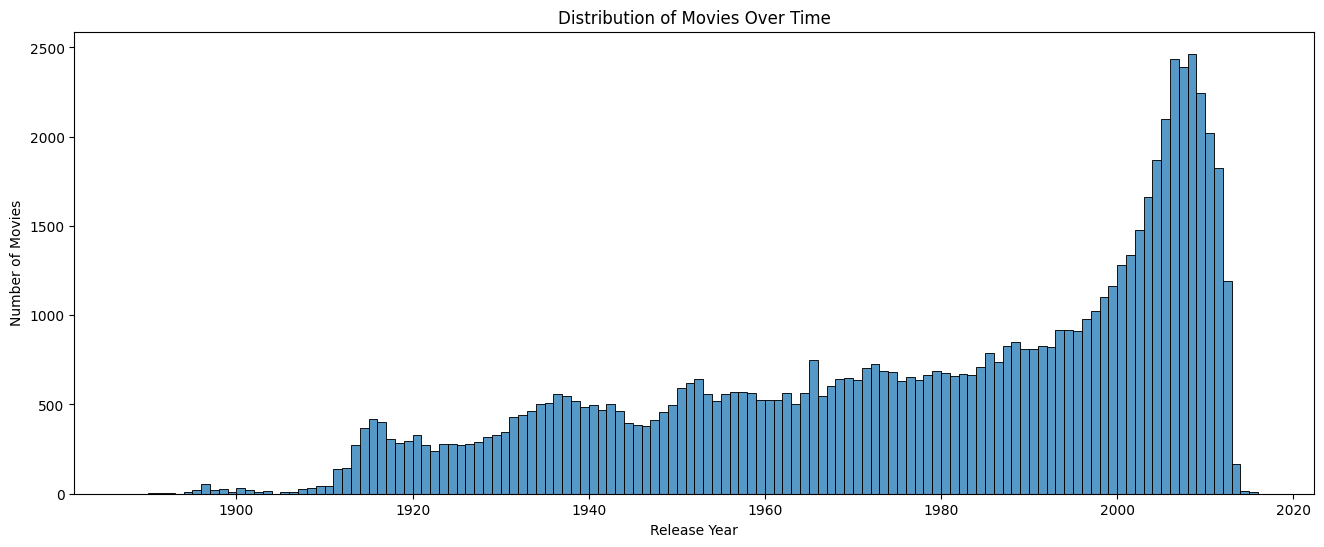

In [32]:
dw.plot_movies_distribution(movies_clean_df)

## Distribution of number of film realized by country
 - This code processes the dataset by filtering out movies with missing country and plot data, excluding collaborative films, counting the number of movies released by each country, applying a cutoff for countries with fewer than 100 movies, and visualizing the distribution of movie releases per country with a bar plot.

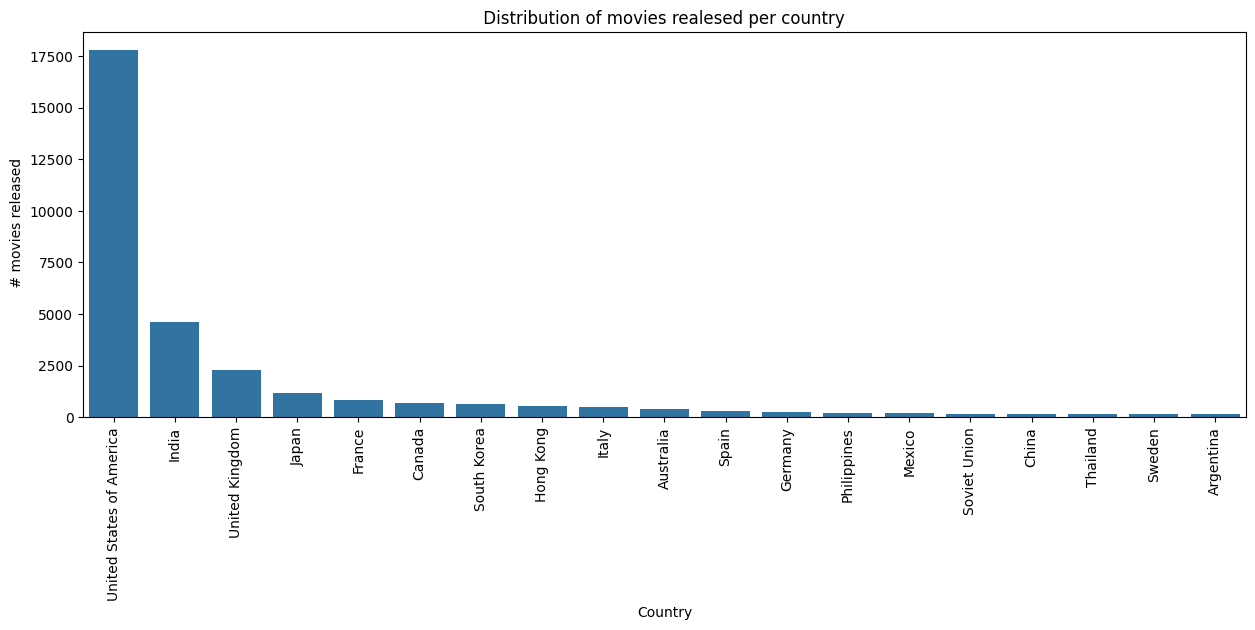

In [12]:
dist_per_country1_df=dw.distributiion_per_country(movies_clean_df)

## Distribution of number of film realized by USA, Soviet Union and Russia

- The following plots allowed us to refute the proposal to compare American films with those of the Soviet bloc before and Russia after so as to see how the Soviet collapse affected the film industry of the two countries. The reason was the lack of data concerning soviet and russian movies.
- Here below we describe the content of the two bar plots:

[Total Movies released by USA, URSS and Russia respectively](#first_graph) : The dataset has been filtered to include only movies from the USA, Soviet Union, and Russia, in order to make a plot of the movies release by these countries only.

[Movies released by USA, URSS and Russia over Time](#second_graph) : The code removes rows with missing values in the `release_date` column, converts the column to an integer type, and then plots the distribution of movies released over time for the USA, Soviet Union, and Russia.

<a id='first_graph'></a>

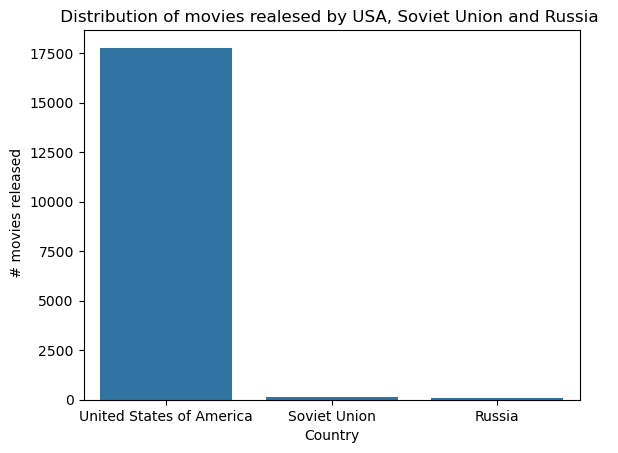

In [9]:
dist_per_sub_country1_df = dw.distributiion_per_sub_country(dist_per_country1_df)

<a id='second_graph'></a>

c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['release_date'] =date_df['release_date'].astype(int)


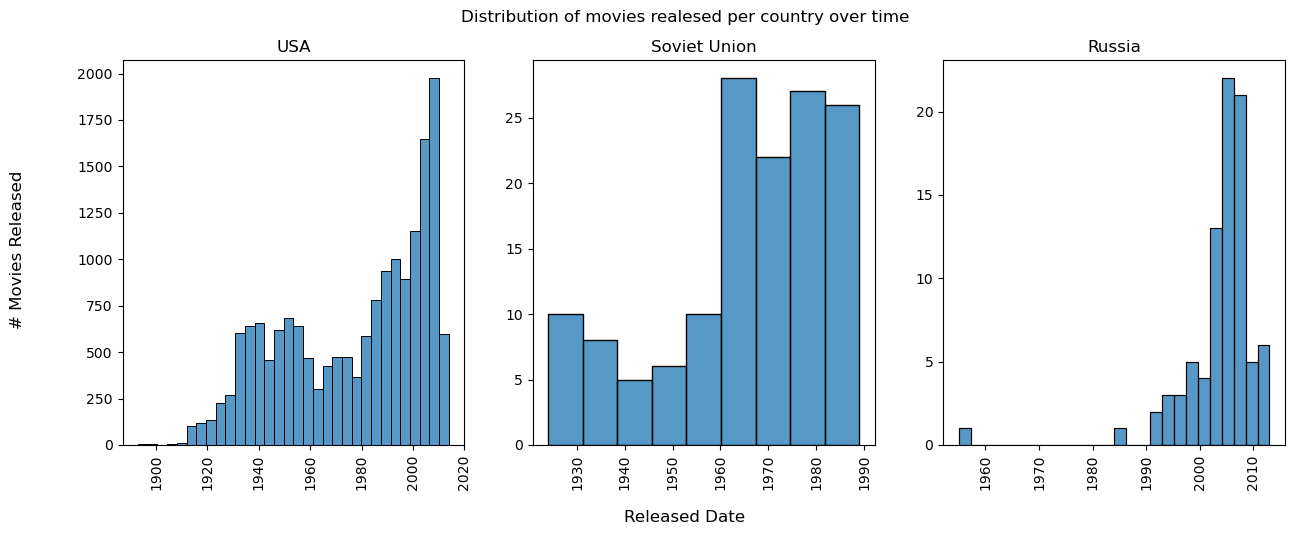

In [10]:
dist_per_country1_date_df = dw.filter_date(dist_per_sub_country1_df)

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Distribution of movies realesed per country over time')
fig.supylabel('# Movies Released', x = 0.05)
fig.supxlabel('Released Date', y = -0.05)
plt.subplot(1,3,1)
#plot distribution of movies released by USA over time
dw.plot_USA_date_distribution(dist_per_country1_date_df)

plt.subplot(1,3,2)
#plot distribution of movies released by Soviet Union over time
dw.plot_Soviet_date_distribution(dist_per_country1_date_df)

plt.subplot(1,3,3)
#plot distribution of movies released by Russia over time
dw.plot_Russia_date_distribution(dist_per_country1_date_df)



## Analysis per Region

In the context of our analysis, it is also relevent to compare movies released per region in the world. To begin with, let's start by looking at the distribution of movies realesed per region to see if enough data is provided considering this separation.

In order to do that, followings step has been done :
- Define different region with corresponding country in it as a List
- Create a function that tells in which region a country belong to
- Apply this function to column "country" and store result in a new column: "region"


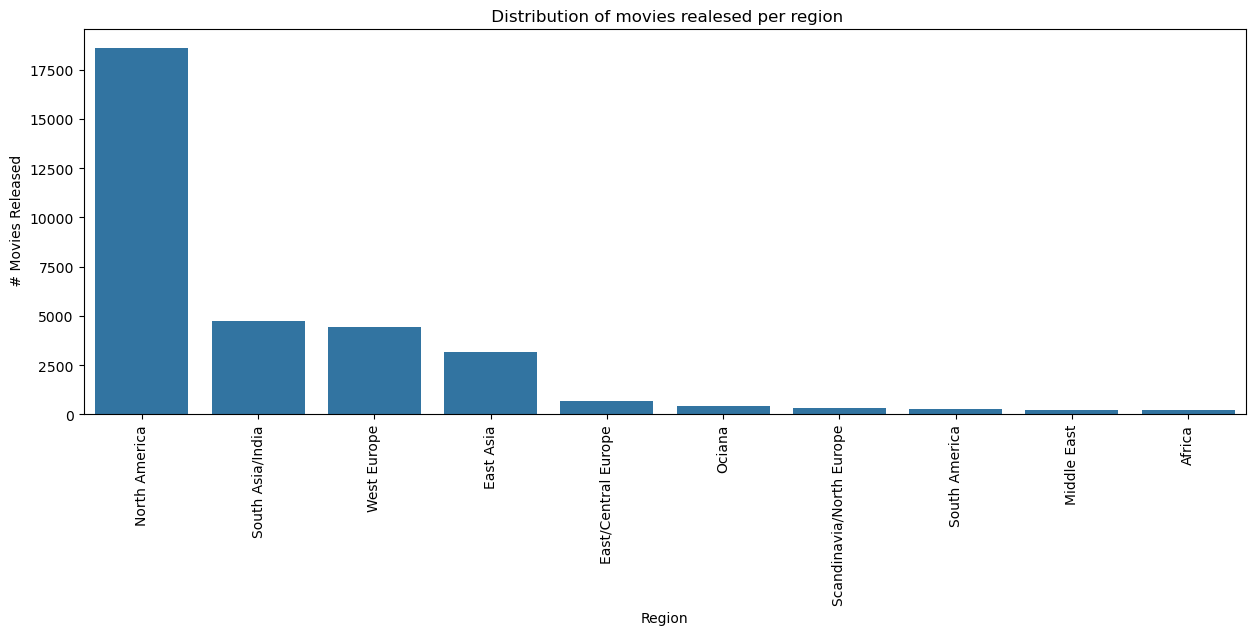

In [11]:
dist_per_region_df =dw.add_region_column(dist_per_country1_df)

# distribution of number of film realized by region
dw.plot_distribution_per_region(dist_per_region_df)

Since the project focus on consquence of historical events, let's consider the time variable. However, due to a low number of movies realesed and the relevence for the project, Ociana, South America, Middle East and Africa regions have been omitted from this analysis. 

Therefore, to plot the remainings regions, for each of them a filter has been applied to the dataset **dist_per_region_df**  to consider only the region in purpose and results is obtained by using the method `sns.histplot(...)` and selecting column **released_date**.

c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['release_date'] =date_df['release_date'].astype(int)


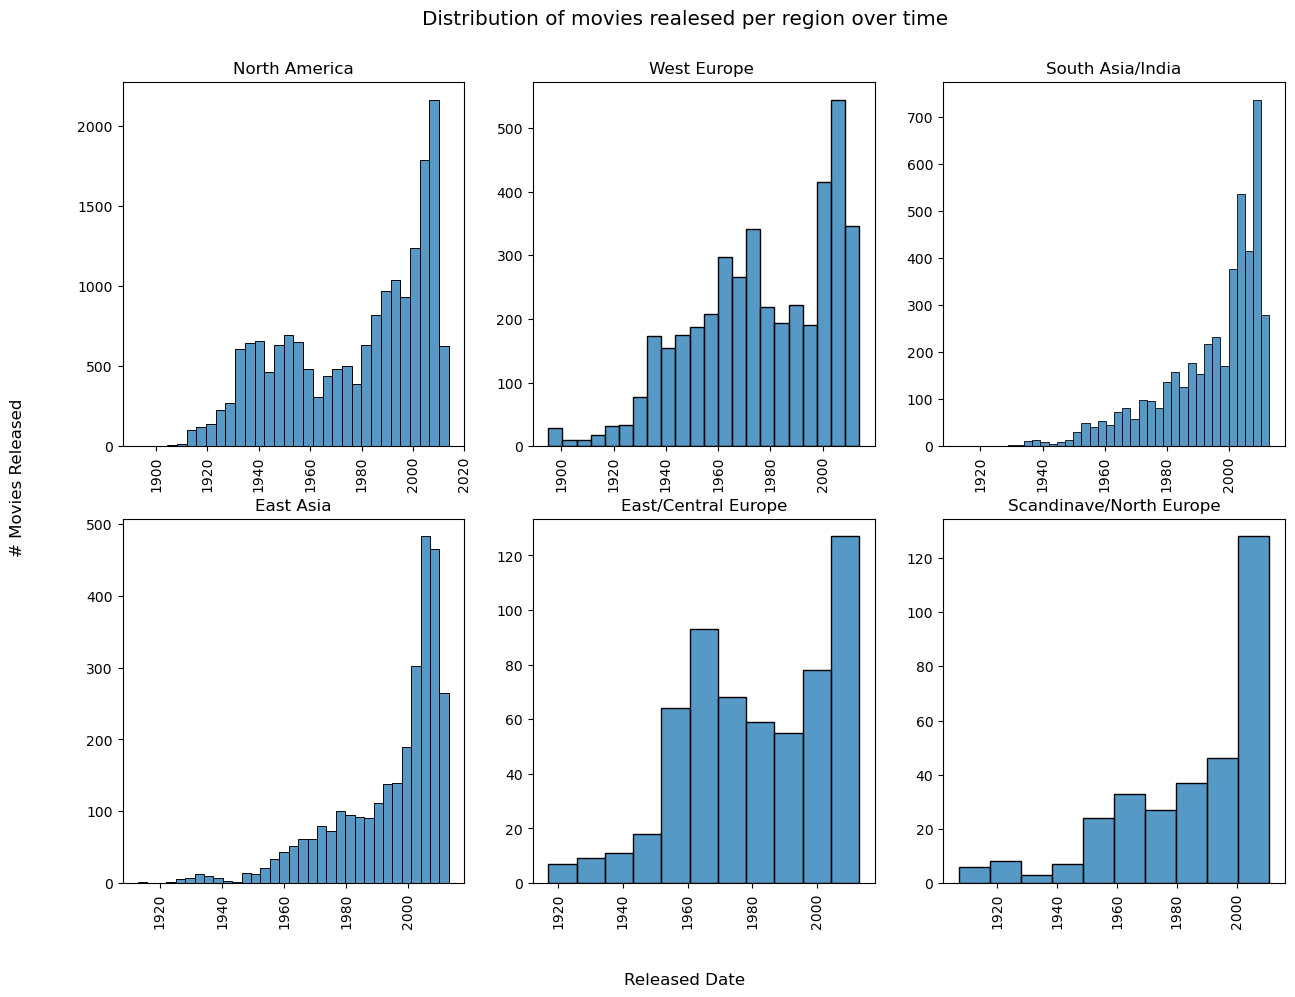

In [12]:

dist_per_region_date_df = dw.filter_date(dist_per_region_df)


fig = plt.figure(figsize=(15, 10.4))
fig.suptitle('Distribution of movies realesed per region over time', size = 'x-large', y =0.95)
fig.supylabel('# Movies Released', x = 0.05)
fig.supxlabel('Released Date')

plt.subplot(2,3,1)
#North America: distribution of film realized over time
dw.north_america_plot(dist_per_region_date_df)

plt.subplot(2,3,2)
#West Europe: distribution of film realized over time
dw.west_europe_plot(dist_per_region_date_df)

plt.subplot(2,3,3)
#South Asia/India: distribution of film realized over time
dw.south_asia_india_plot(dist_per_region_date_df)

plt.subplot(2,3,4)
#East Asia: distribution of film realized over time
dw.east_asia_plot(dist_per_region_date_df)

plt.subplot(2,3,5)
# East/Central Europe: distribution of film realized over time
dw.east_central_europe_plot(dist_per_region_date_df)


plt.subplot(2,3,6)
# Scandinavia/North Europe: distribution of film realized over time 
dw.scandinave_north_europe_plot(dist_per_region_date_df)





## Collaboration movies

So far, only films made solely by one country have been analysed. However, it would also be interesting to see how movies that have been created by a collaboration of different countries have evolved over time to see if historical events had an impact.

To begin with, let's see if the number of films resulting from collaboration between countries is large enough to conduct an analysis. Since the entries of columns **country** are just `string` data type, the method `str.split(...)` to convert the `string` into `List` of string. After this since the order in the list is not relevent, a converstion of the `List` into `Set` is applied. Finally, the length of each **country** entry is counted and the dataframe is filtered, keeping only those films whose length is greater than 1. So the total number of films created by a collaboration of several countries is given by the length of the final dataframe 

In [13]:
collaboration_movies_df = dw.filter_collaboration(movies_clean_df)

Number of movies made by more than one country: 9218


Let's focus on collaborations with the United States and look at the distribution of countries that have collaborated with him. To achieve this, the here are the mains steps :
- Filter dataframe to get only film that collaborate with USA
- Remove USA from the Set 
- Use `explode(...)` method to split and duplicate movies that have several contributors
- Use `values_count` method to get the distribution 


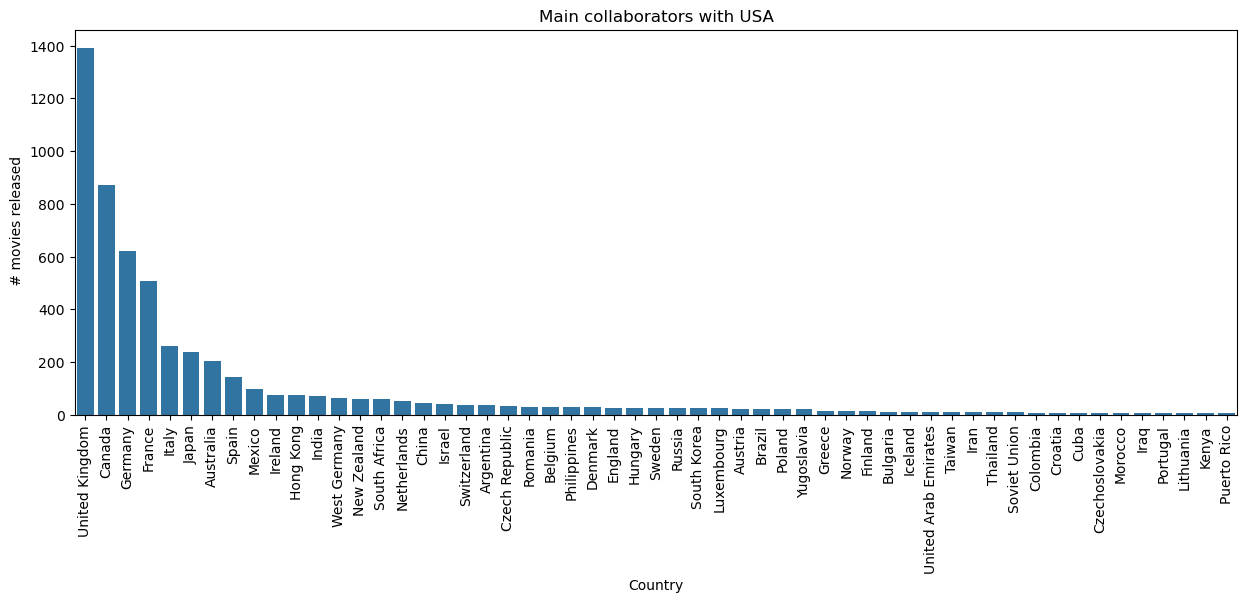

In [14]:
collaborationUSA_movies_df = dw.filter_collaboration_USA(collaboration_movies_df)

Like in the previous section, one can analyse this distribution but by considering also the time ! To achieve this, the idea is the follow. First remove movies that have no **released_date** and then compute crosstable with `crosstab(...)` method. However by doing only this, the obtaining dataframe will be of the shape [110 x 104] which is not readable. Furthermore, the date columns is not continious (in year). To remedy theses two problems, an empty dataframe was created with the same index and column label, but with the missing dates added. By applying `combine_first(...)` all the dates that already had a value are kept as they are, and the dates on which the labels did not exist are created with NaN as their entries. These entries are replaced by zero. To solve the display problem, a function has been created to group the data by period. In addition, only a few countries from the list of all collaborations are taken into account. 

In [15]:
collab_date_df = dw.collab_USA_over_time(collaborationUSA_movies_df)

merge_collab_date_df = dw.merge_dates_column(collab_date_df)
merge_collab_date_df


c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collabUSA_movies_date_df['release_date'] = collabUSA_movies_date_df['release_date'].astype(int, copy= True)


release_date,[1910 - 1919],[1920 - 1929],[1930 - 1939],[1940 - 1949],[1950 - 1959],[1960 - 1969],[1970 - 1979],[1980 - 1989],[1990 - 1999],[2000 - 2009],[2010 - 2013]
collaboration,,,,,,,,,,,
Canada,1,0,3,3,4,10,29,101,155,469,75
China,0,0,0,0,0,0,0,3,3,26,10
England,0,1,0,1,1,2,2,3,6,8,3
France,1,2,1,6,12,33,21,39,130,200,53
German Democratic Republic,0,0,0,0,0,0,0,0,1,0,0
Germany,0,1,4,1,2,4,10,18,109,432,34
Hong Kong,0,0,0,0,0,1,10,14,10,30,9
India,0,0,0,0,1,1,2,1,6,39,20
Iraq,0,0,0,0,0,0,0,0,0,7,0


The heatable corresponding to the dataframe is as follows. The colour scale has been normalized by column (i.e. by country) to make it easier to see variations by year.

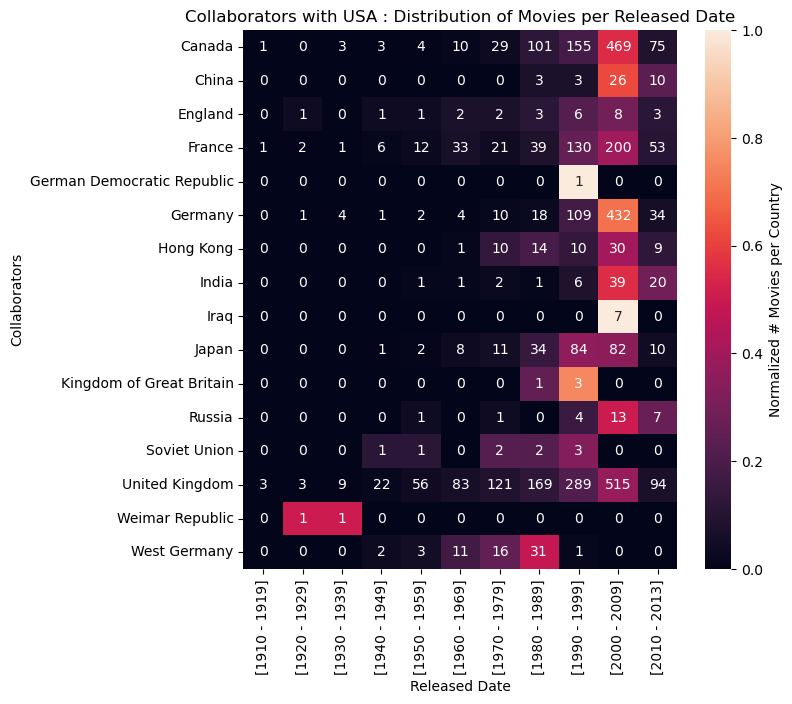

In [16]:
dw.normelize_collab_USA_heatmap(merge_collab_date_df)

## Genres analysis


In [23]:
genres = movies_clean_df['genres'].dropna().unique()
unique_genres = set()
for genre_list in genres:
    for genre in genre_list.split(', '):
        unique_genres.add(genre)
genres = np.array(list(unique_genres))
print(genres)
len(genres)

['Space opera' 'LGBT' 'Swashbuckler films' 'Sword and Sandal'
 'Social problem film' 'Neorealism' 'Illnesses & Disabilities'
 'World cinema' 'Fantasy' 'Homoeroticism' 'Crime Thriller' 'Educational'
 'Fictional film' 'Spy' 'Dance' 'New Queer Cinema' 'Christian film'
 'Art film' 'Absurdism' 'British Empire Film' 'Gulf War' 'Concert film'
 'Chinese Movies' 'Courtroom Comedy' 'Education' 'Action/Adventure'
 'Hip hop movies' 'Propaganda film' 'Historical drama'
 'Silhouette animation' 'Mockumentary' 'Fantasy Adventure' 'Heist'
 'Interpersonal Relationships' 'Bruceploitation' 'Stoner film'
 'School story' 'Singing cowboy' 'Comedy-drama' 'Anthropology'
 'Comedy Thriller' 'Extreme Sports' 'Short Film' 'Black-and-white'
 'Comedy' 'Sci Fi Pictures original films' 'Adventure'
 'Heaven-Can-Wait Fantasies' 'Christmas movie' 'Inspirational Drama'
 'Filmed Play' 'Avant-garde' 'Language & Literature' 'Action Comedy'
 'Bloopers & Candid Camera' 'Mumblecore' 'Cavalry Film' 'Silent film'
 'Musical' 'Psyc

363

In this section we are interested of the genre of american movies. 

In [36]:
american_movies_count = len(movies_clean_df[movies_clean_df['country'].str.contains('United States of America', na=False)])
print(f'The number of American movies is: {american_movies_count}')
percentage_american_movies = (american_movies_count / len(movies_clean_df)) * 100
print(f'The percentage of American movies is: {percentage_american_movies:.2f}%')

The number of American movies is: 34408
The percentage of American movies is: 42.04%


c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['release_date'] =date_df['release_date'].astype(int)
c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_genre_df['genres'] = USA_genre_df['genres'].str.split(', ')


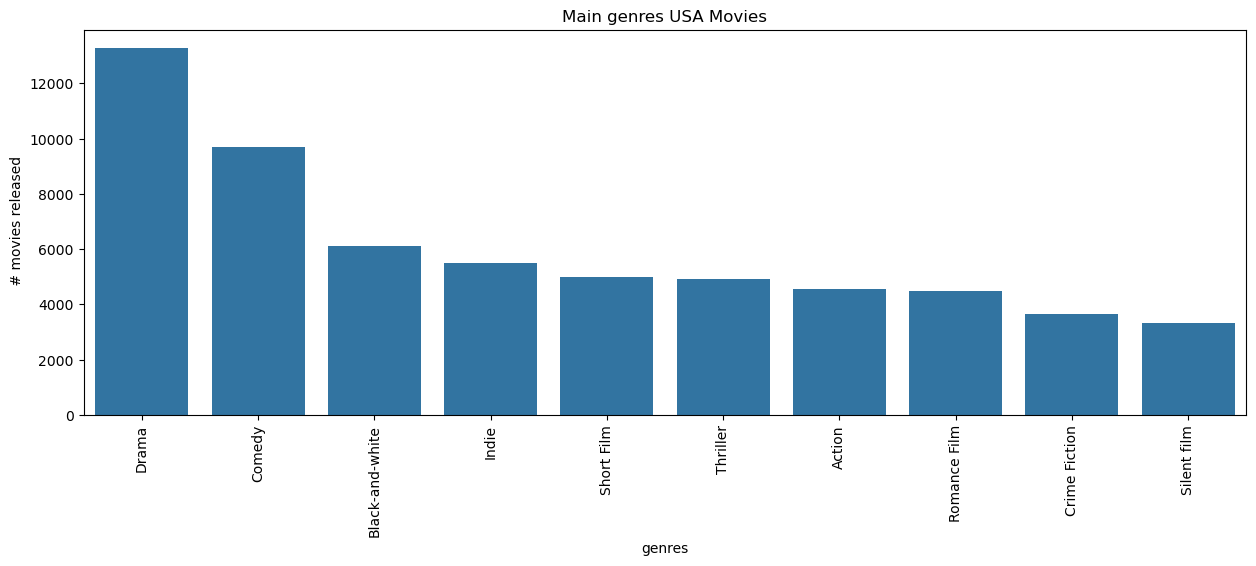

In [17]:
# dict reference for normalization 
USA_date_weight_dict =dw.dict_USA_date_weight(movies_clean_df)

# plot dominent genre in df
USA_dominent_genre_df, USA_genre_df = dw.dist_USA_dom_genre_plot(movies_clean_df)


c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['release_date'] =date_df['release_date'].astype(int)


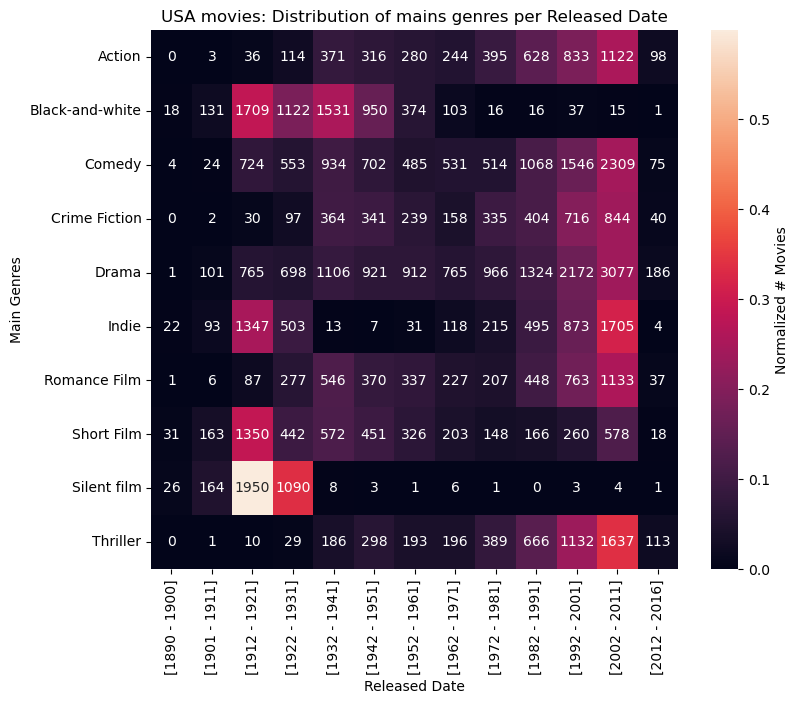

In [18]:
# deeper -> go overtime 
USA_dominent_genre_date_df = dw.filter_date(USA_dominent_genre_df)
dw.plot_genres_heat_map(USA_dominent_genre_date_df)


c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = df['release_date'].map(dict_weight)


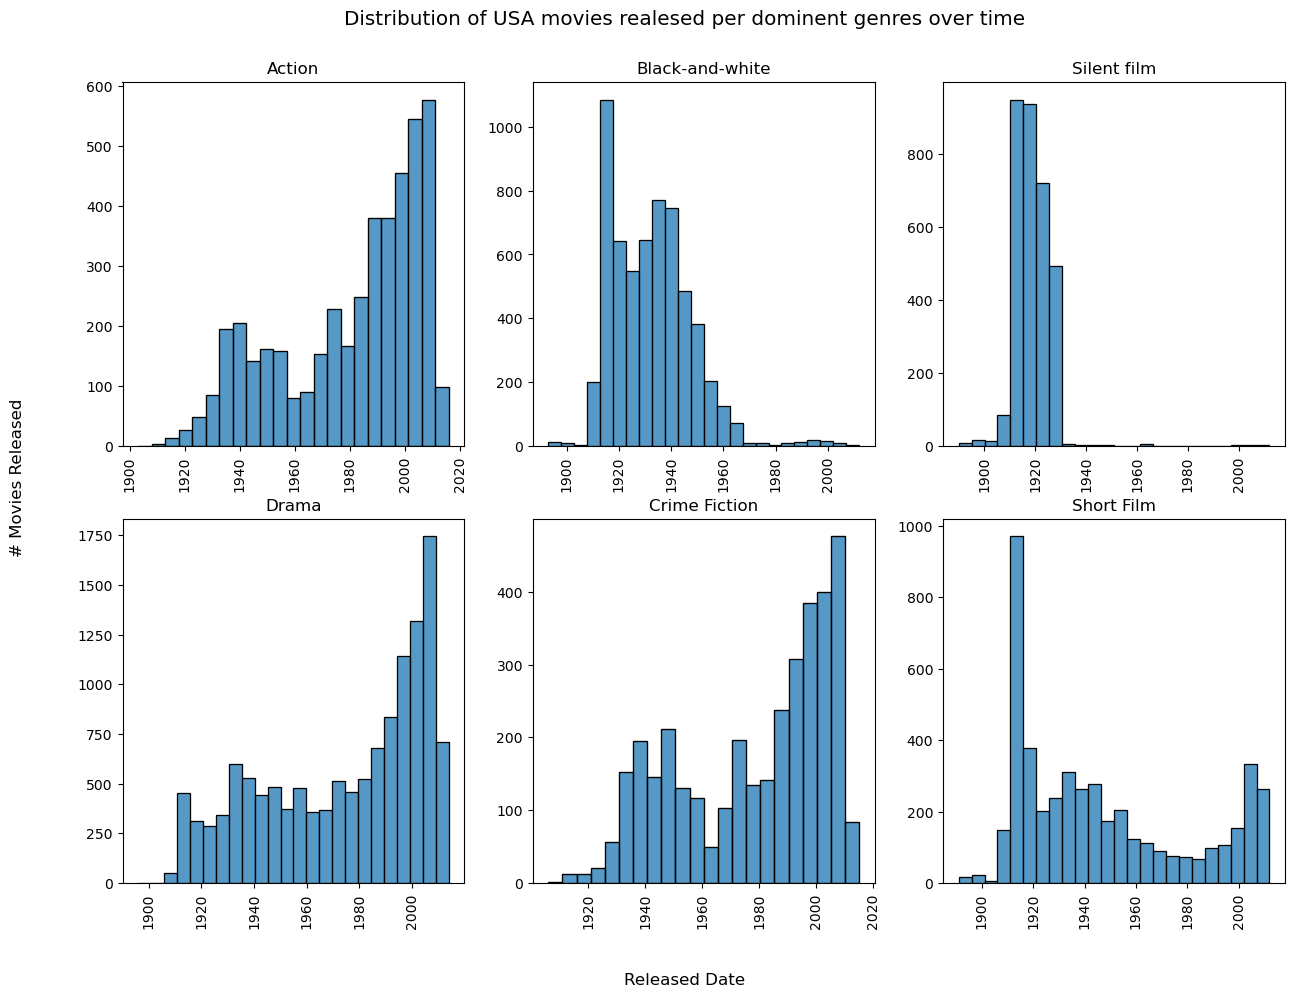

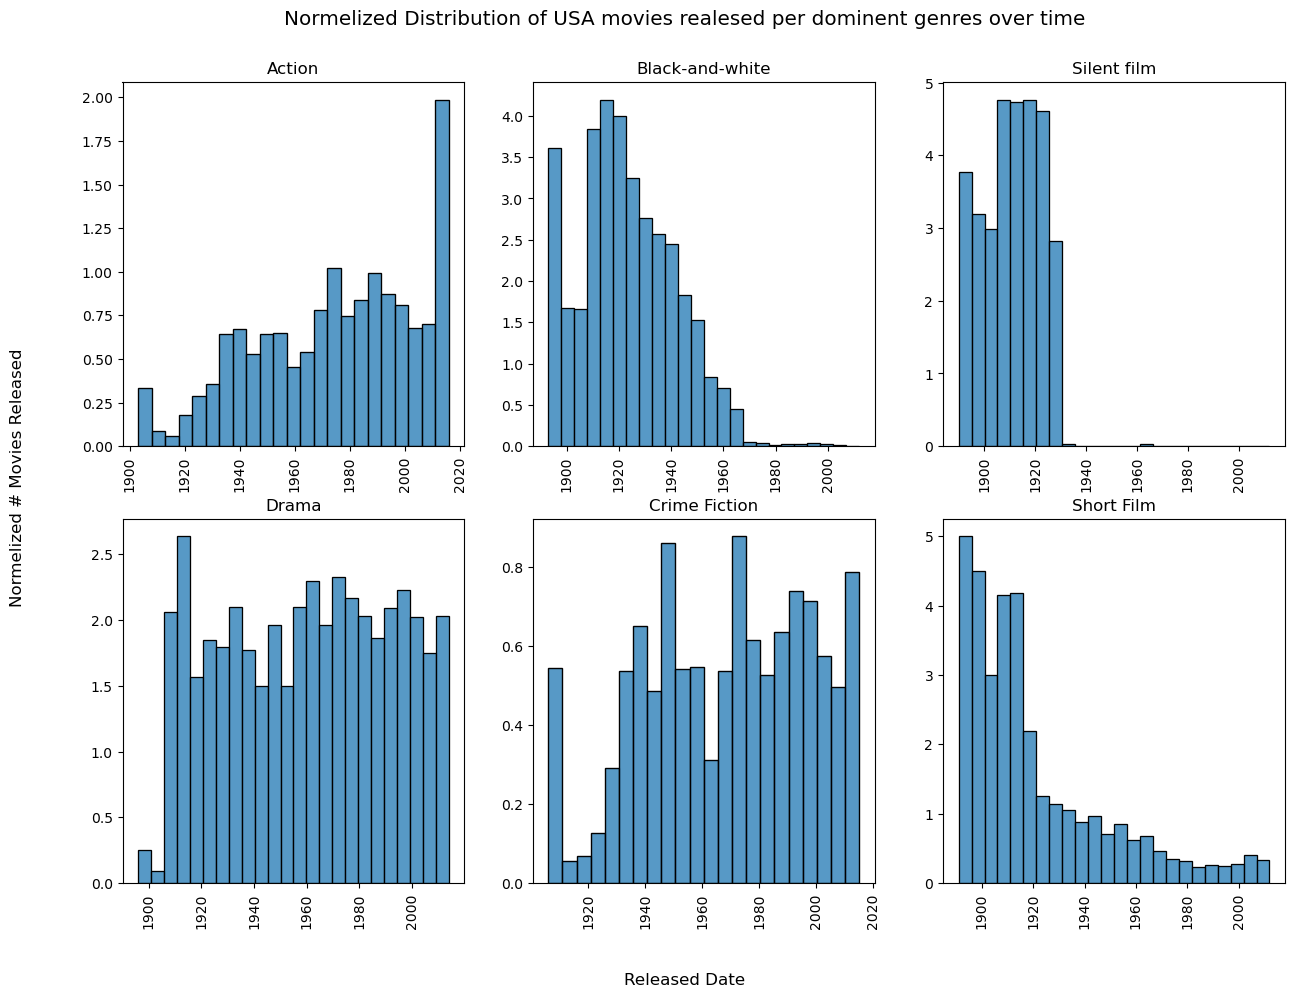

In [19]:
# montre histo de certain genres
dw.hist_dom_genres_plots(USA_dominent_genre_date_df) #### montrer bug pour bin 1
dw.hist_dom_genres_plots(USA_dominent_genre_date_df, normelized= True, dict_weight= USA_date_weight_dict) 

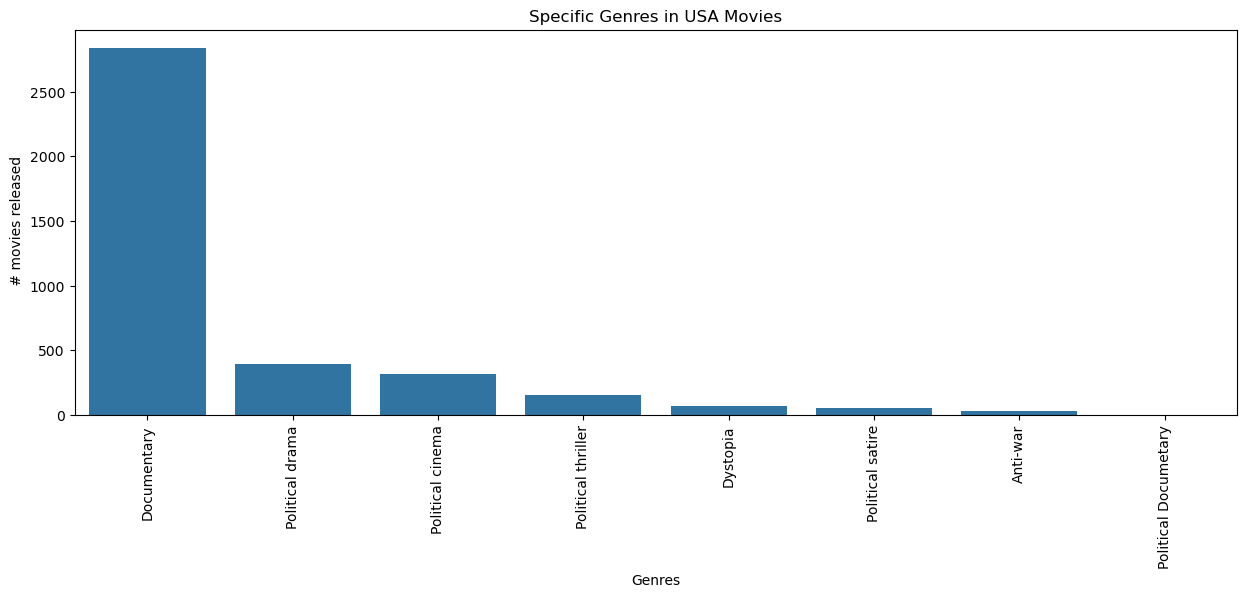

In [20]:
# focus on a specific list less of dominant genres
USA_specific_genre_df = dw.dist_spec_genre_plot(USA_genre_df)


c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['release_date'] =date_df['release_date'].astype(int)


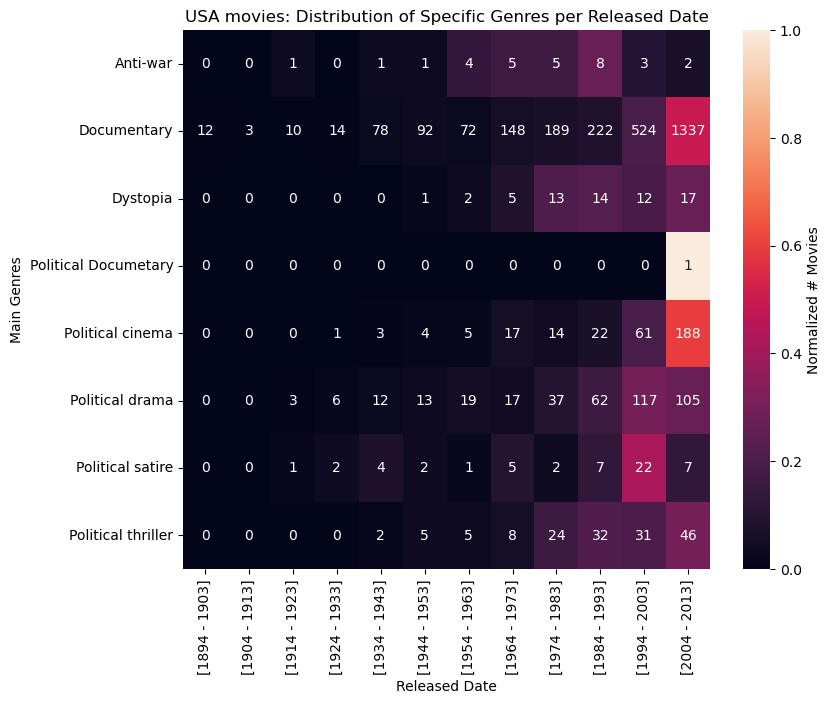

In [21]:
# deeper in analysis --> over time 
USA_specific_genre_date_df = dw.filter_date(USA_specific_genre_df)
dw.plot_spec_genres_heat_map(USA_specific_genre_date_df)

c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = df['release_date'].map(dict_weight)


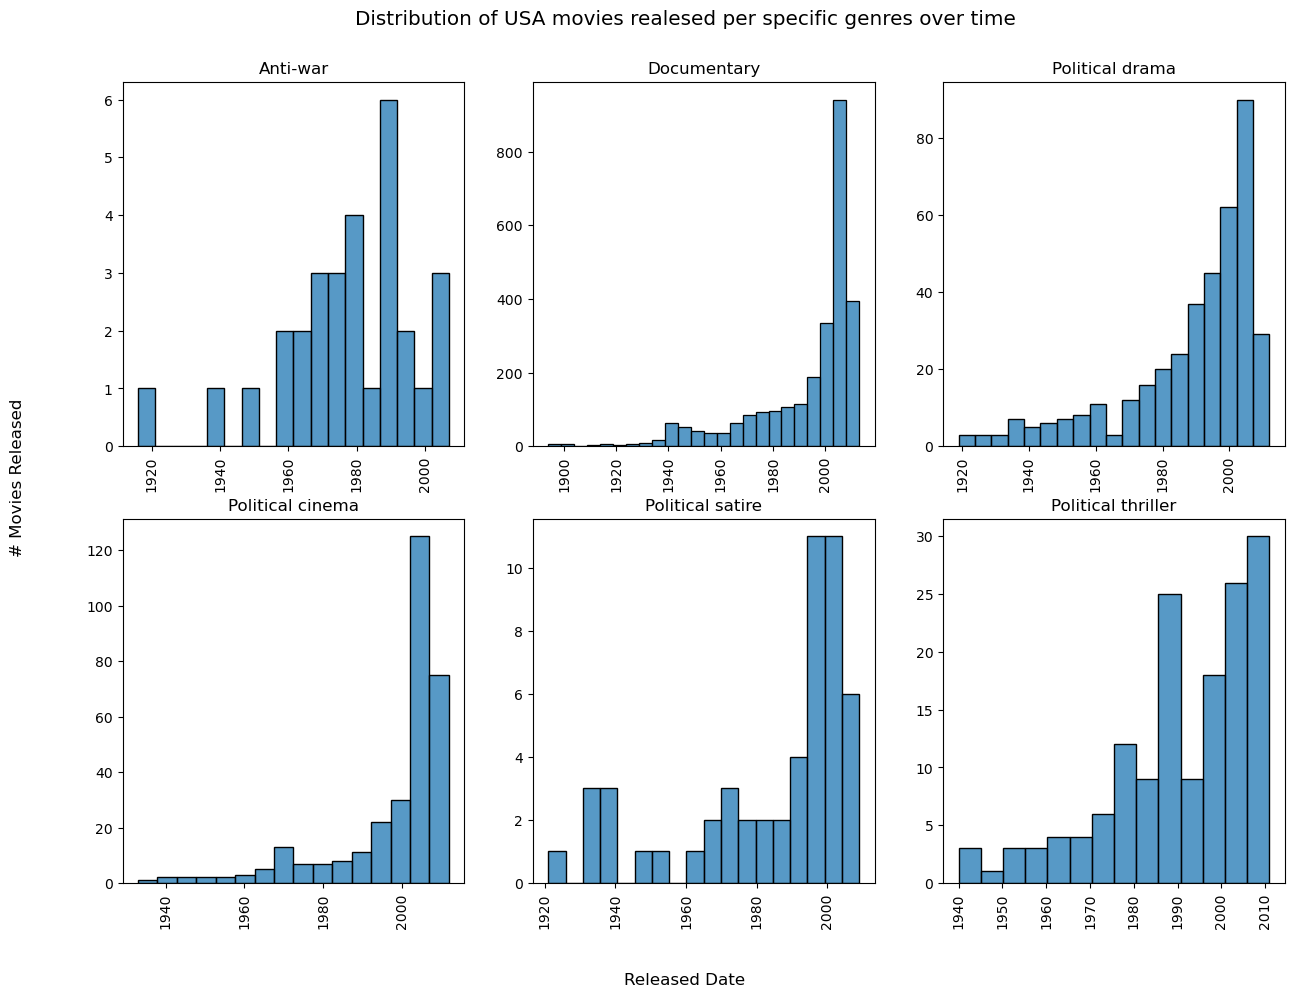

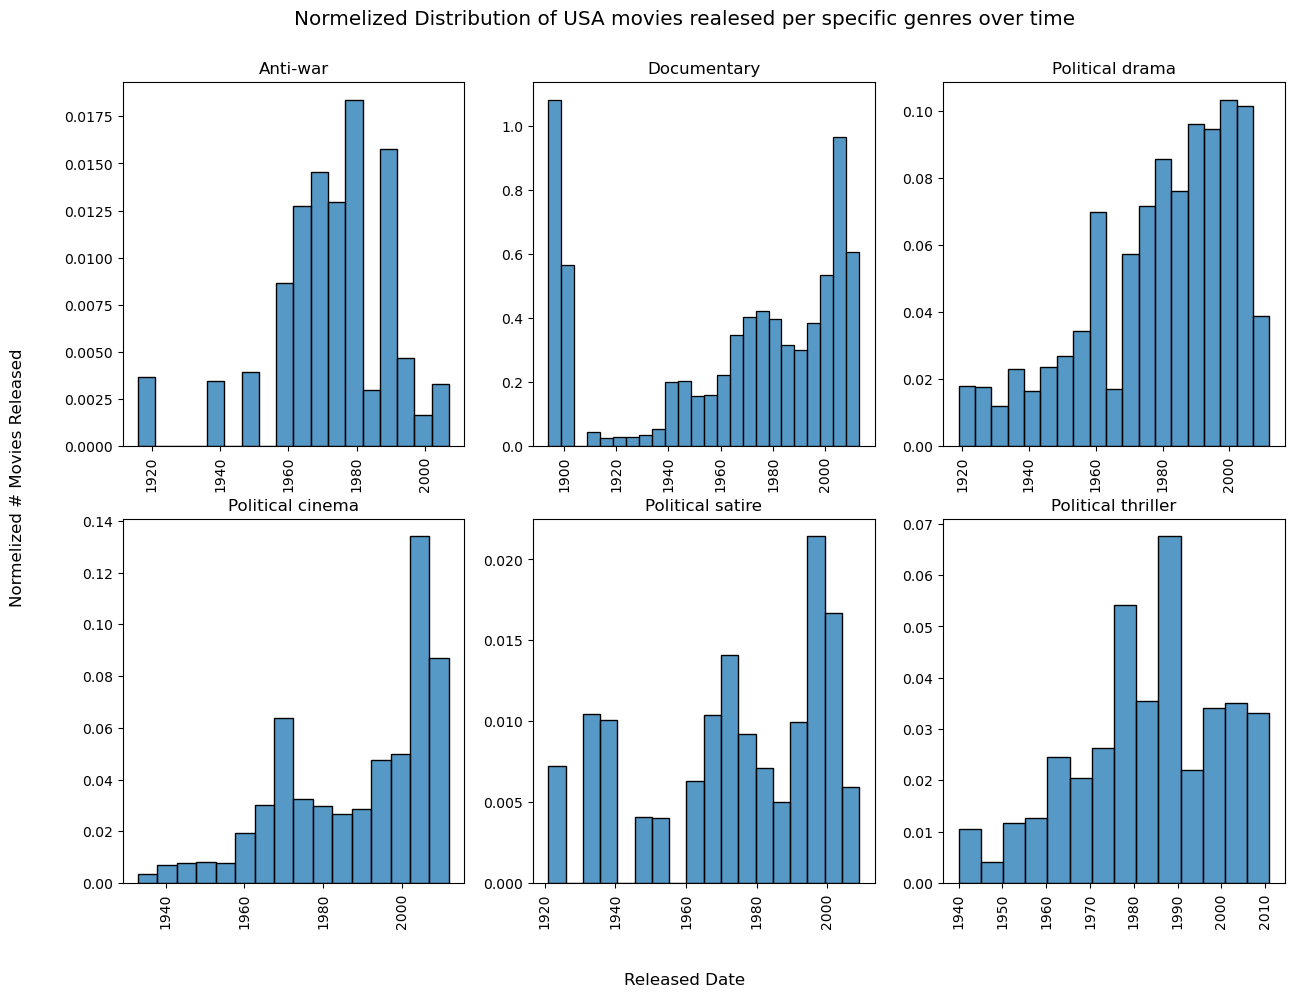

In [22]:
# focus sur certain genre
dw.hist_spec_genres_plots(USA_specific_genre_date_df)
dw.hist_spec_genres_plots(USA_specific_genre_date_df, normelized= True, dict_weight= USA_date_weight_dict)

## Historical events in plots analysis

In [38]:
war_event_list = ["Political", "Anti-war", 'politic', 'war', 'revolution', 'Propaganda', 'Ideology', 'Military']
pattern = '|'.join(war_event_list)
social_theme_movies_count = len(movies_clean_df[movies_clean_df['plot'].str.contains(pattern, case=False, na=False)])
social_theme_USA_movies_count = len(movies_clean_df[(movies_clean_df['plot'].str.contains(pattern, case=False, na=False)) & (movies_clean_df['country'].str.contains('United States of America', na=False))])
print(f'The number of films with war themes in their plot is: {social_theme_USA_movies_count}')

The number of films with war themes in their plot is: 9070


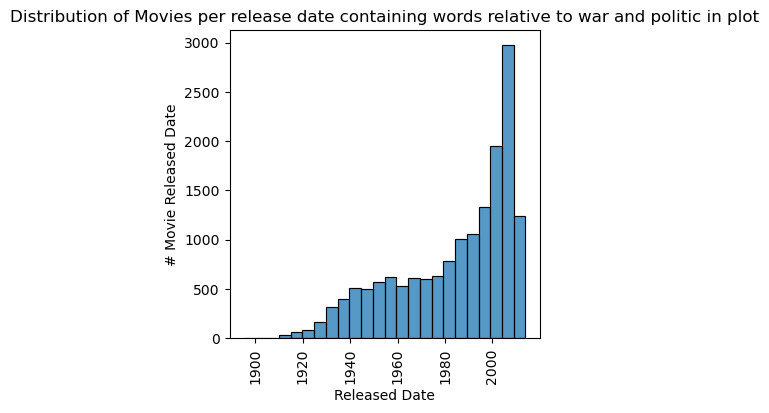

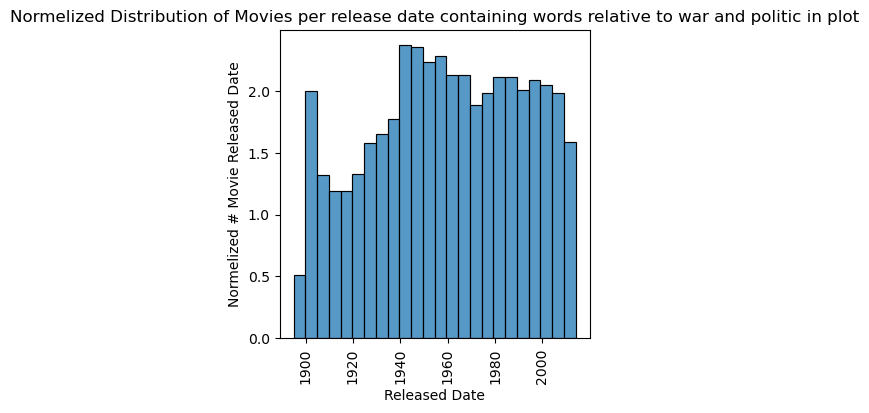

In [23]:
# dict reference for normalization 
plot_date_weight_dict =dw.dict_date_plot_weight(movies_clean_df)

event_date_df = dw.filter_per_plot_date(movies_clean_df)
gen_event_date_df = dw.hist_gen_event_date_plot(event_date_df)
normelized_gen_event_date_df = dw.hist_gen_event_date_plot(event_date_df, normelized = True, dict_weight = plot_date_weight_dict)

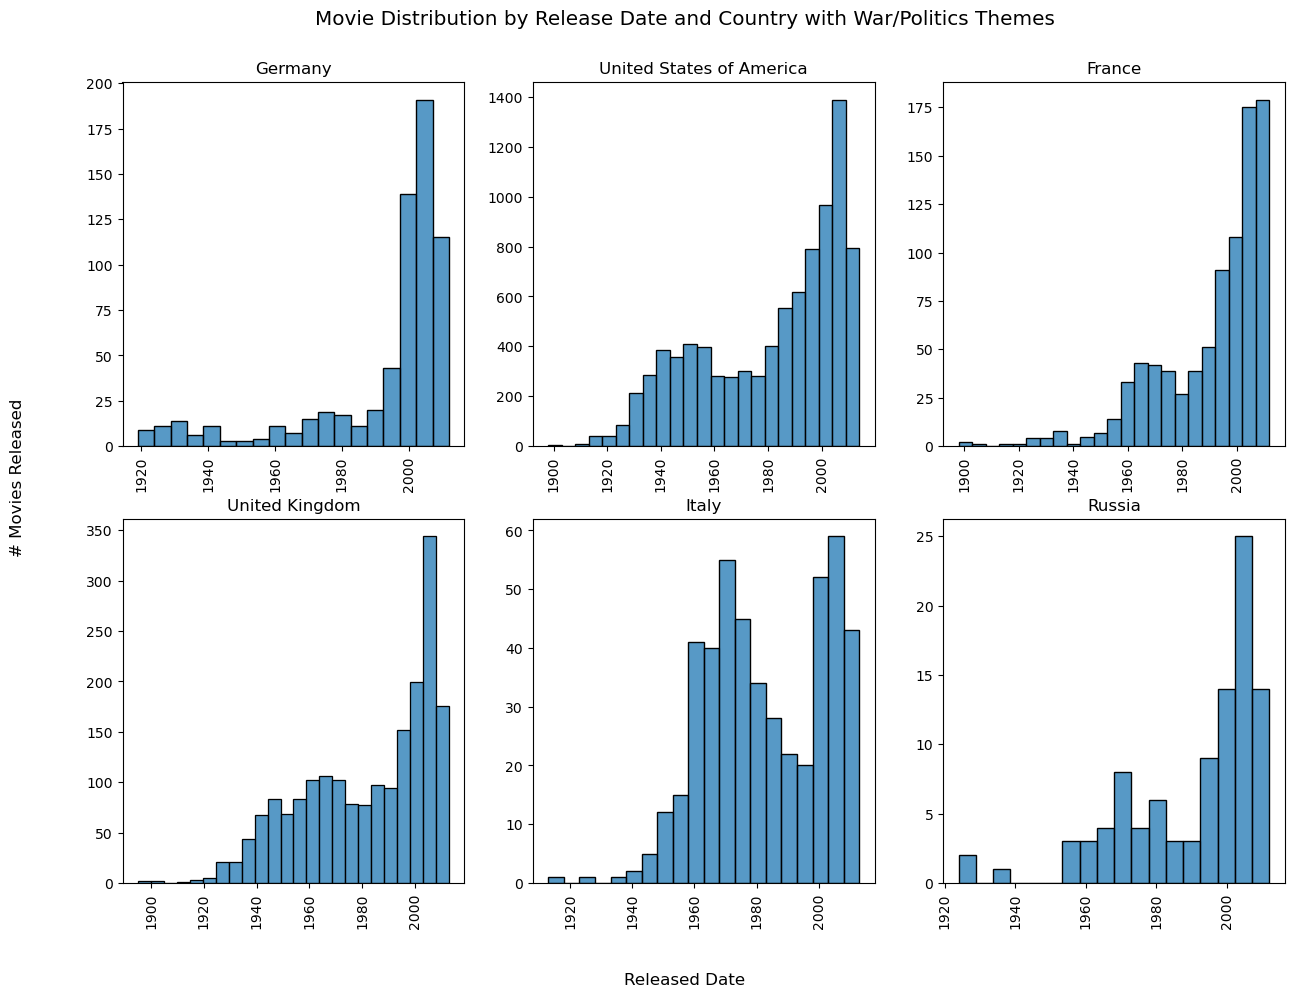

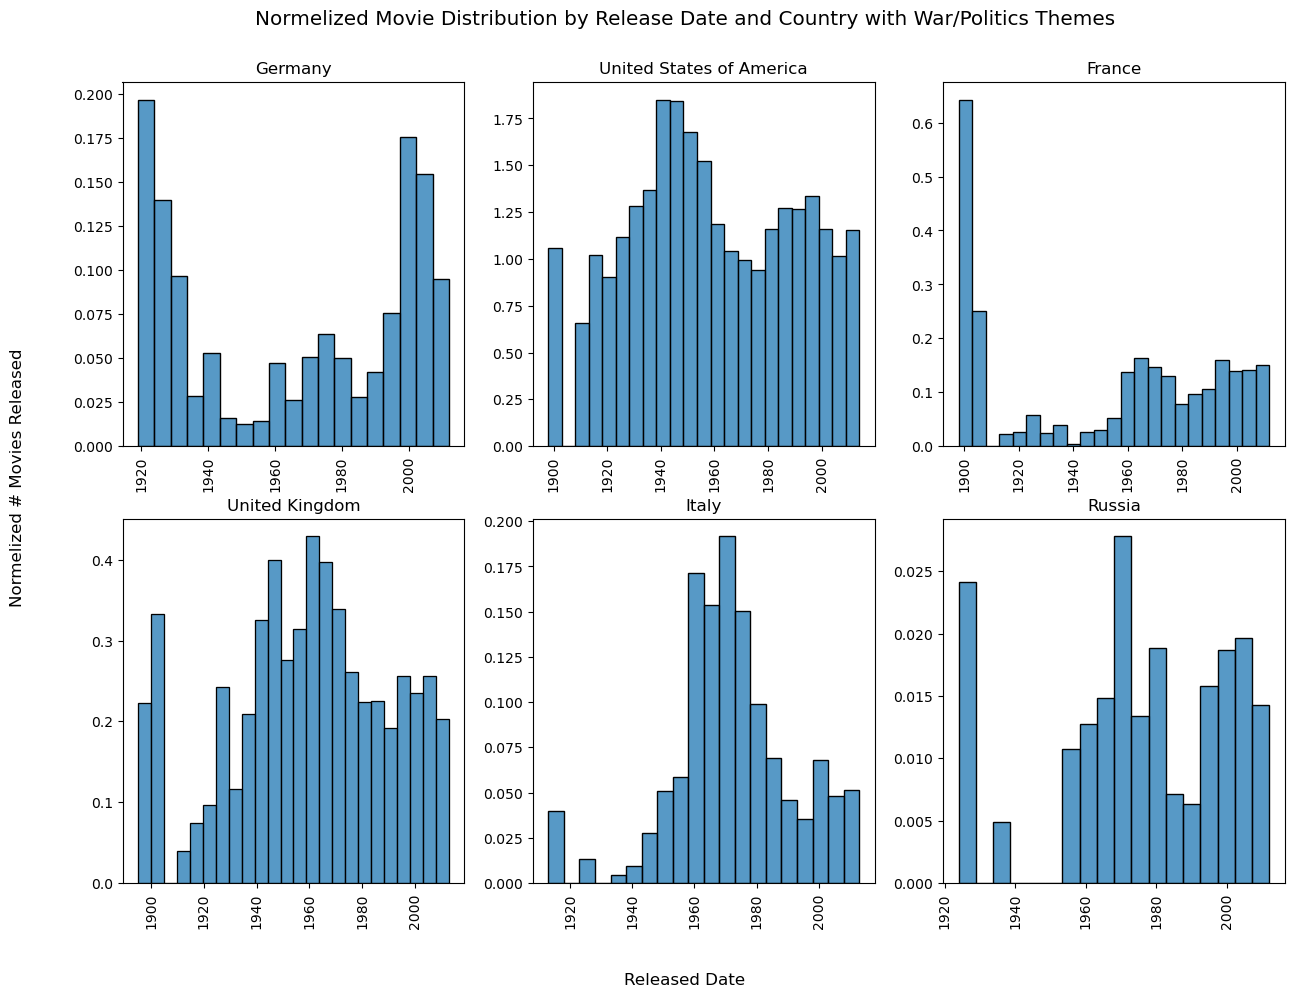

In [24]:
# lets look now at this distribution but per country
country_plot_date_weight_dict = dw.dict_date_plot_country_weight(movies_clean_df) ### en vrai ici on devrait aussi normaliser precisemment en fonction du total dans le pays...
gen_event_date_country_df = dw.filter_per_country(gen_event_date_df)
dw.hist_gen_event_date_plots(gen_event_date_country_df)
dw.hist_gen_event_date_plots(gen_event_date_country_df, normelized = True, dict_weight = country_plot_date_weight_dict)

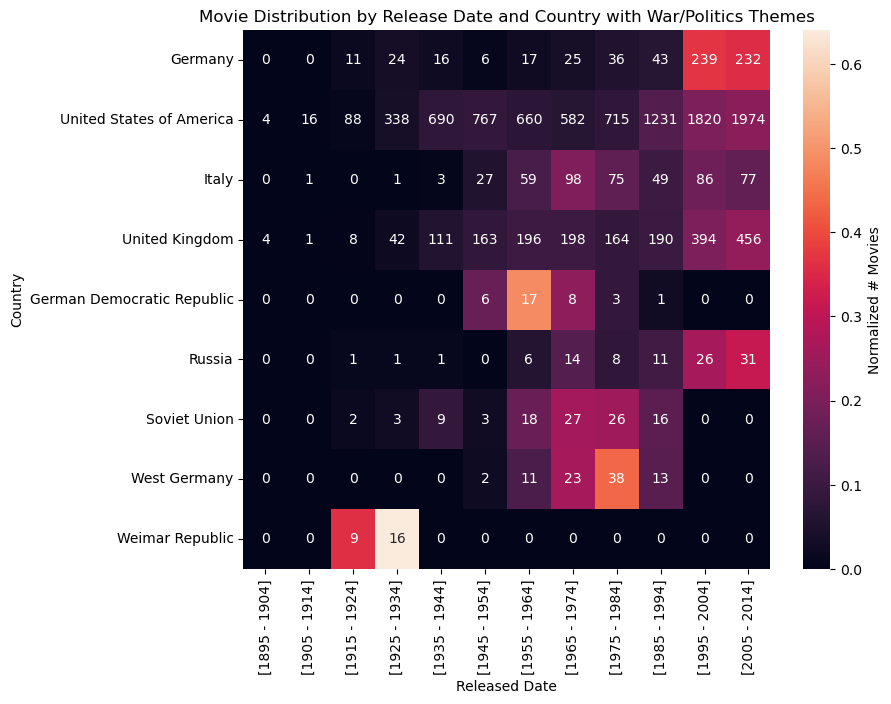

In [25]:
#  heatmap by considering also  Weimar Republic, West Germany and Soviet Union
dw.plot_gen_event_date_country_heatmap(gen_event_date_country_df)
# checker pq DDR et West germany ont des picks 


In [32]:
war_action_movies_df = movies_clean_df[movies_clean_df['genres'].str.contains('War|Action', case=False, na=False)]


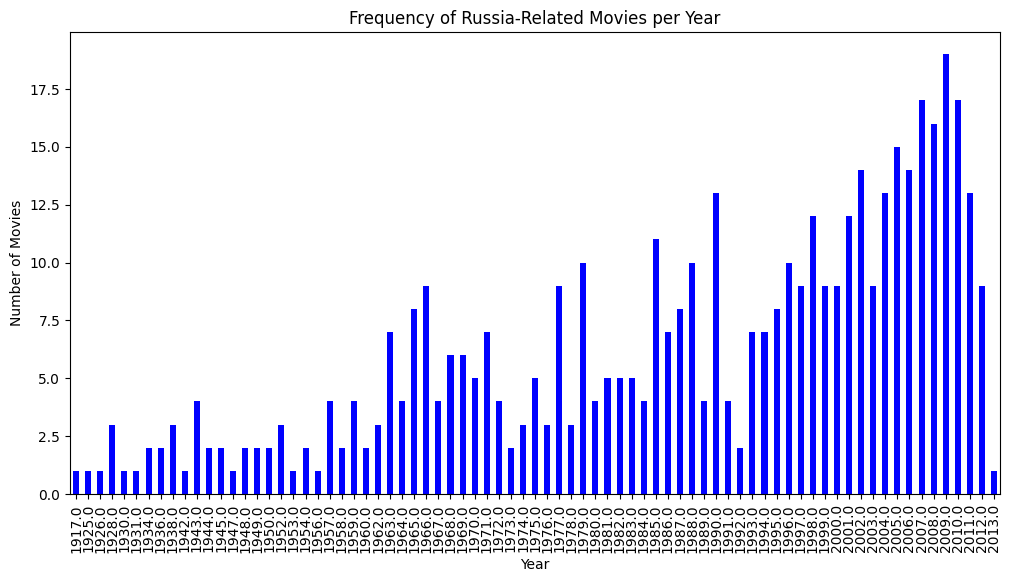

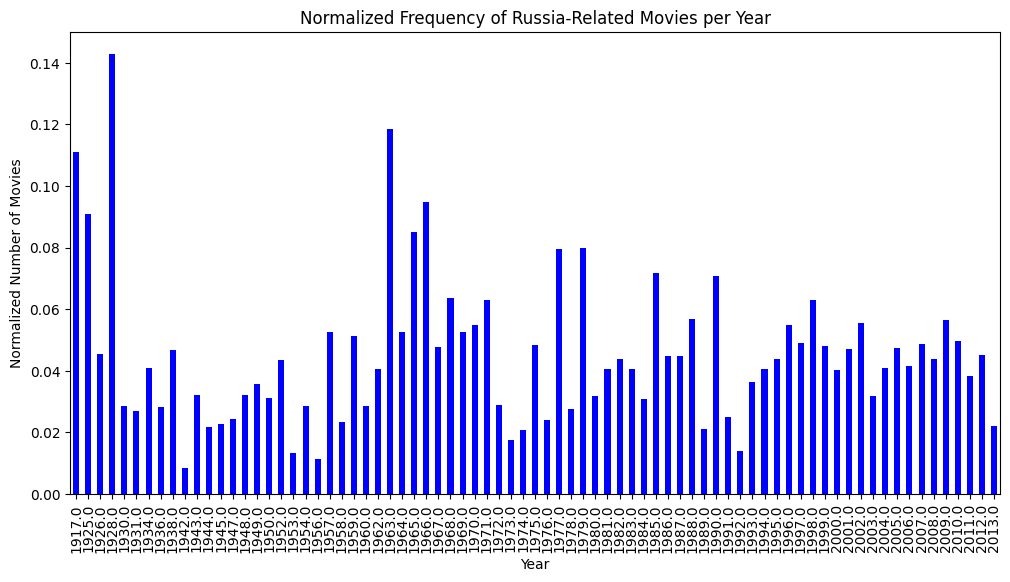

In [33]:
keywords = ['russia', 'russian', 'soviet', 'moscow', 'kremlin', 'kgb','USSR']
dw.plot_event_movies(war_action_movies_df, keywords, 'Russia')

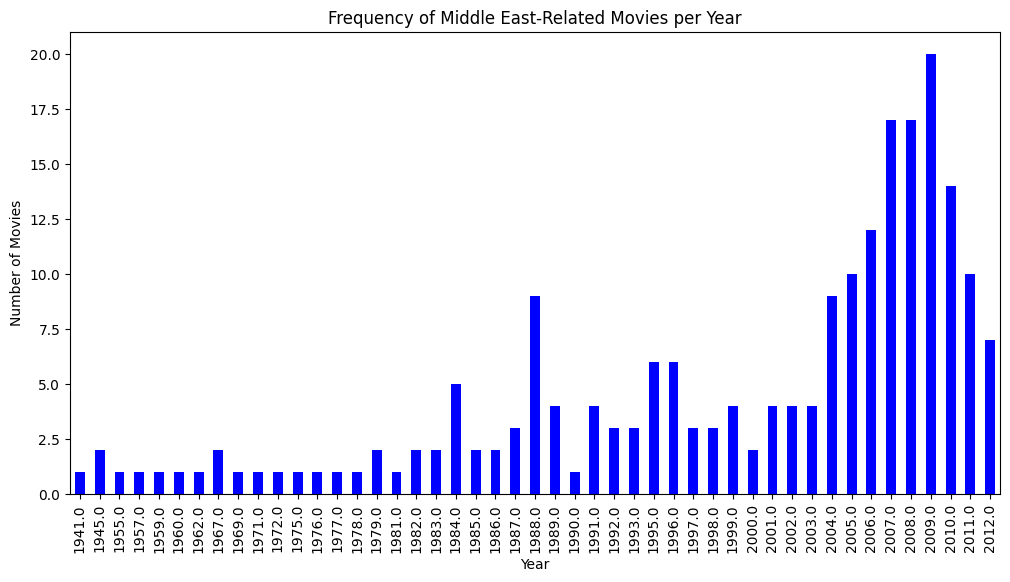

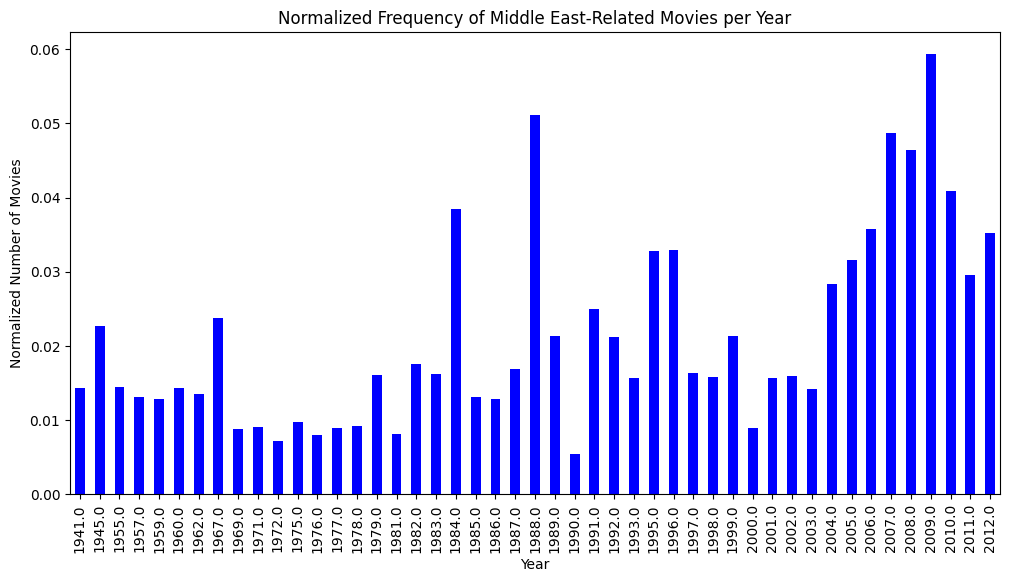

In [34]:
keywords = ['iran', 'iraq', 'afghanistan', 'syria', 'arabic', 'middle east']
dw.plot_event_movies(war_action_movies_df, keywords, 'Middle East')

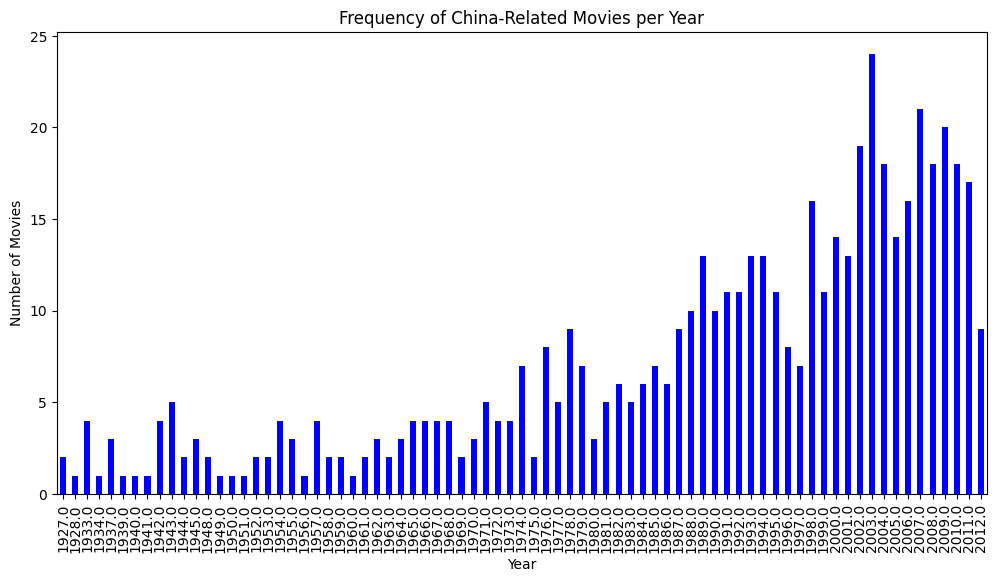

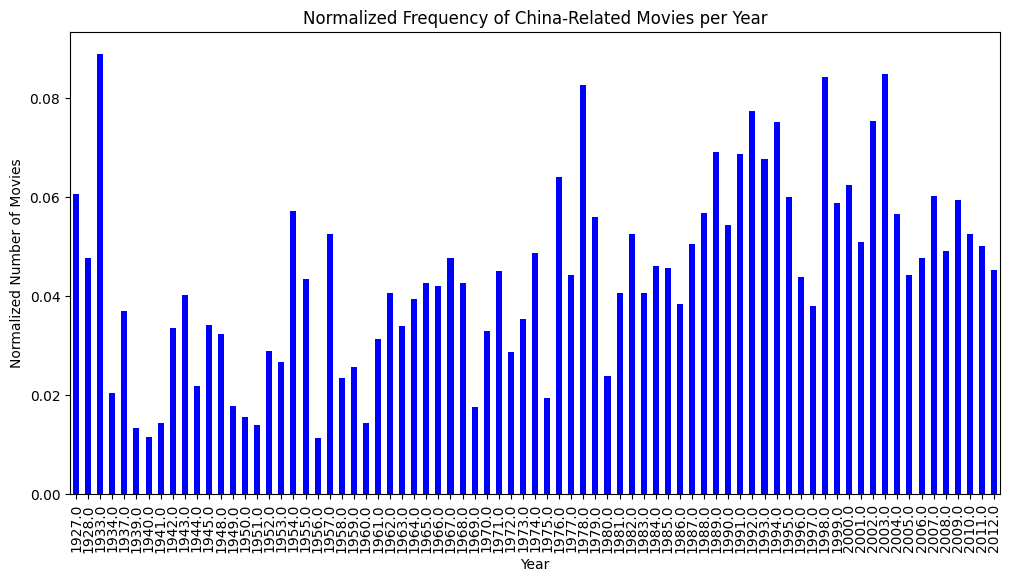

In [36]:
keywords = ['china', 'chinese', 'beijing', 'shanghai', 'hong kong', 'taiwan']
dw.plot_event_movies(war_action_movies_df, keywords, 'China')

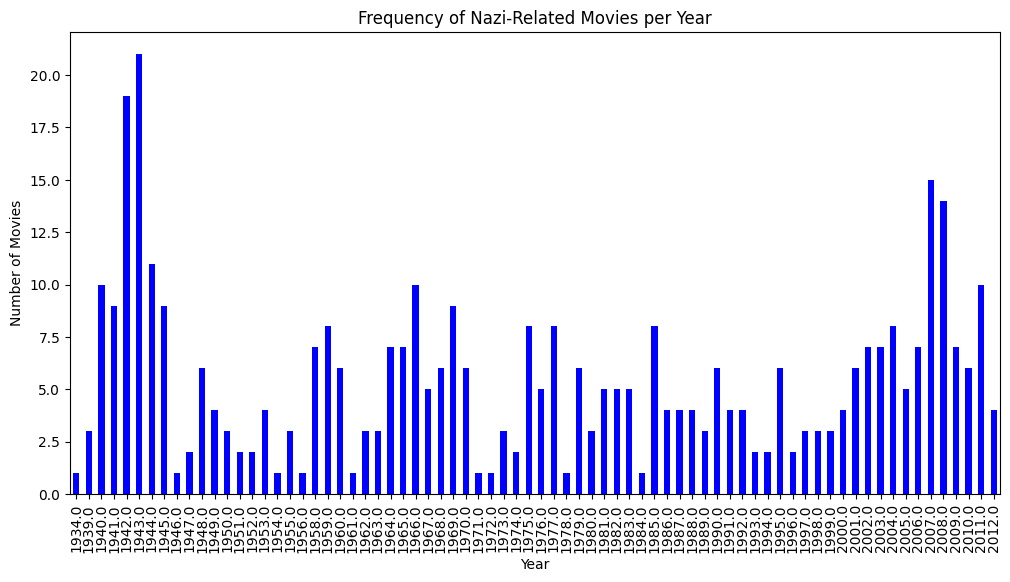

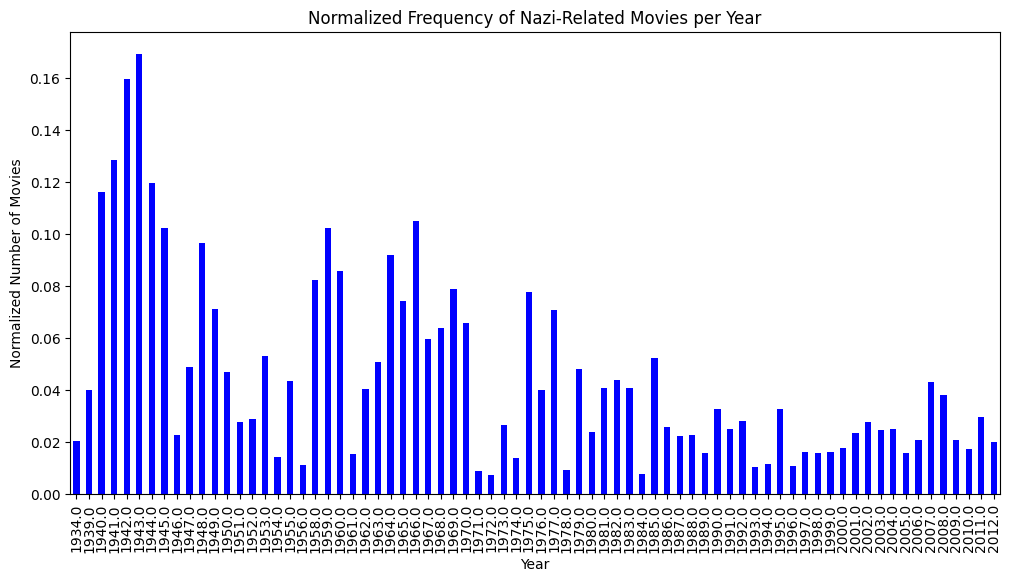

In [37]:
keywords = ['nazi', 'hitler', 'third reich', 'gestapo', 'holocaust','iii reich', 'reichsführer', 'reichstag', 'reichsmark',' ss ']
dw.plot_event_movies(war_action_movies_df, keywords, 'Nazi')

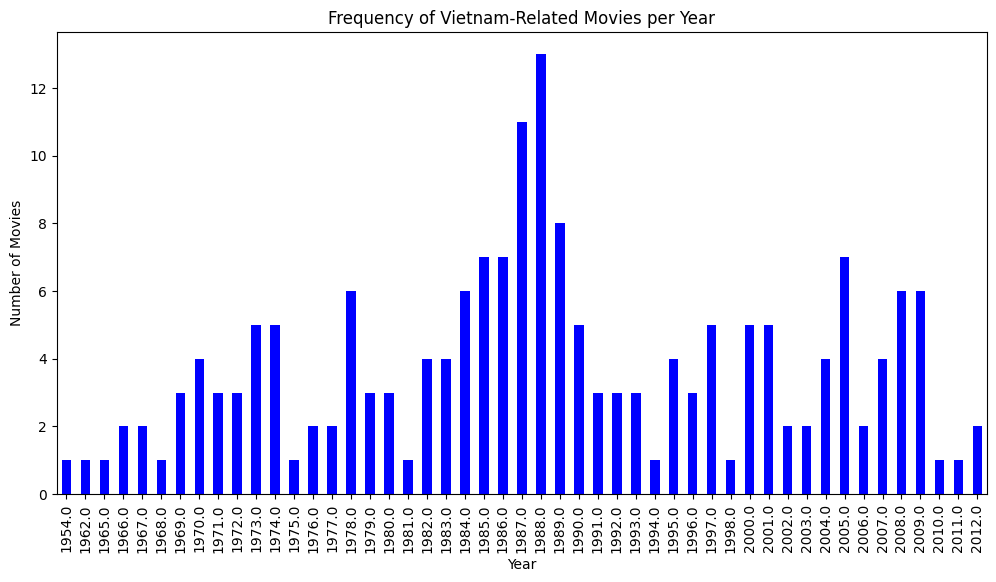

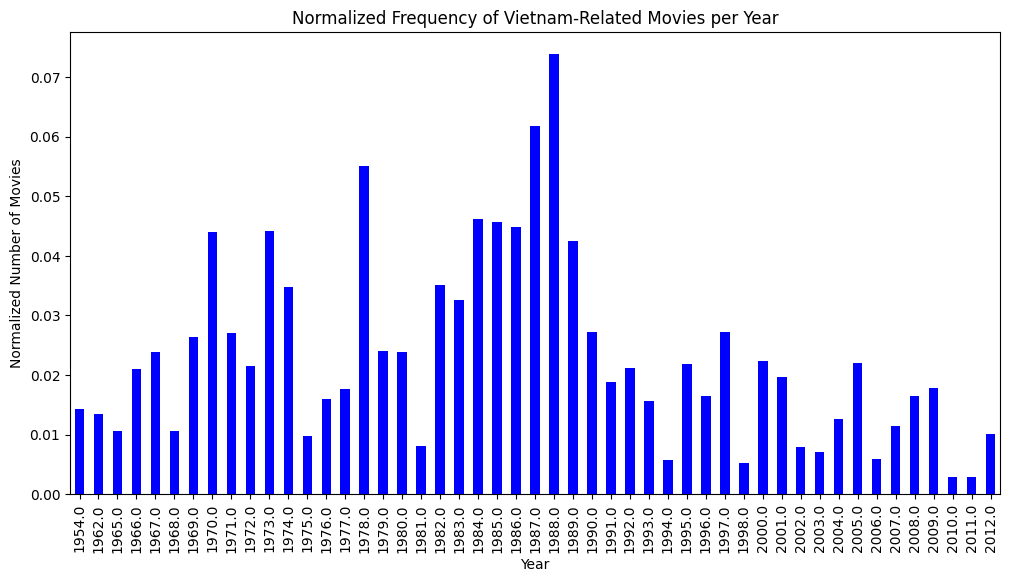

In [38]:
keywords = ['vietnam', 'viet cong', 'saigon', 'hanoi', 'vietminh']
dw.plot_event_movies(war_action_movies_df, keywords, 'Vietnam')

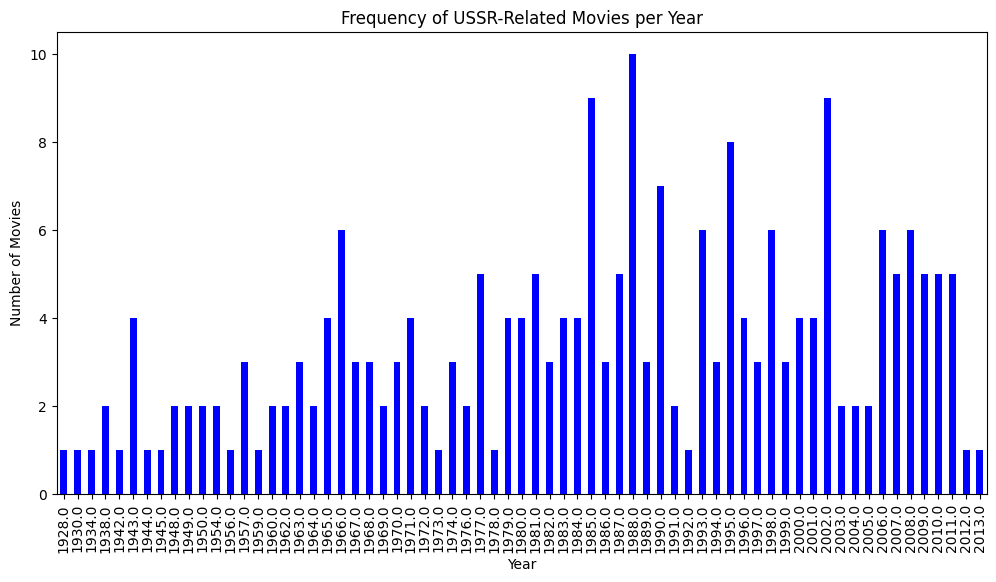

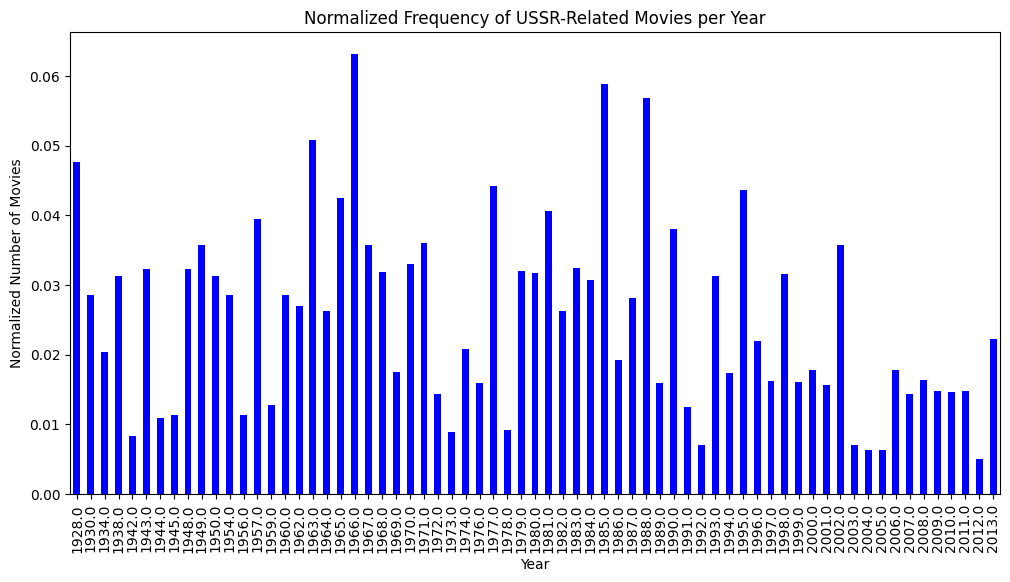

In [39]:
keywords = ['ussr', 'soviet', 'kgb', 'stalin', 'staline', 'gorbatchev','lenin', 'trotsky']
dw.plot_event_movies(war_action_movies_df, keywords, 'USSR')

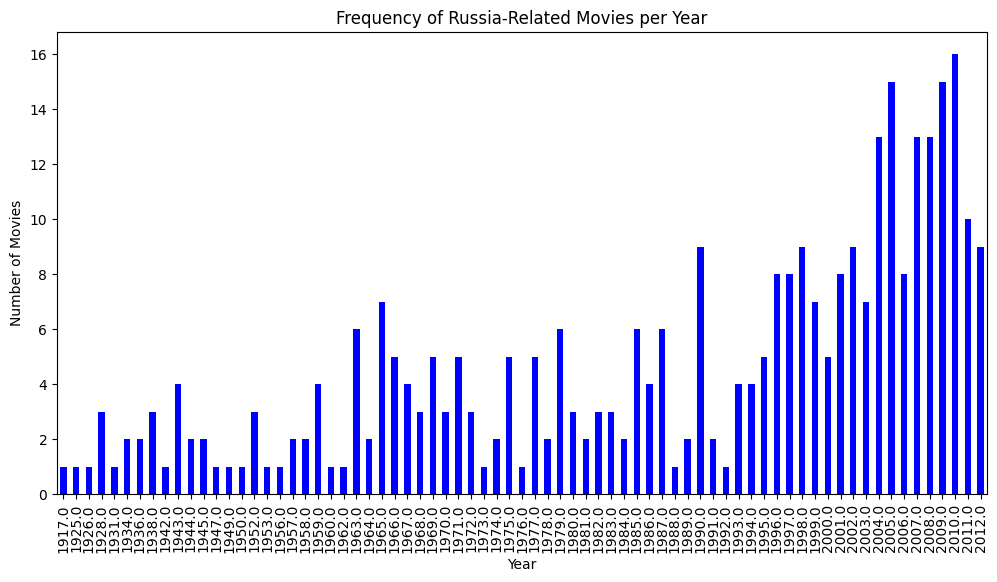

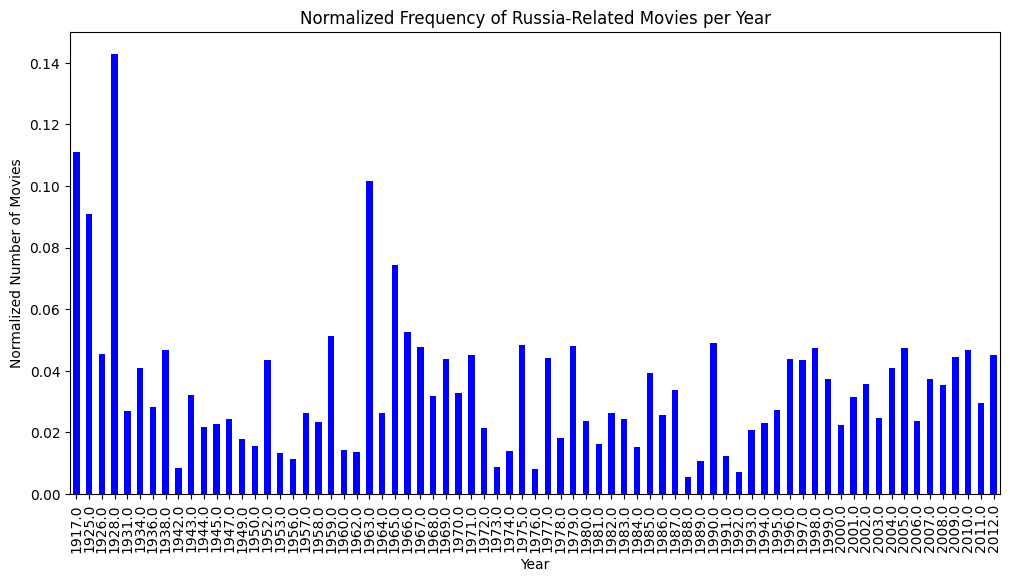

In [40]:
keywords = ['russia', 'russian', 'putin']
dw.plot_event_movies(war_action_movies_df, keywords, 'Russia')

c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['release_date'] =date_df['release_date'].astype(int)
c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = df['release_date'].map(dict_weight)


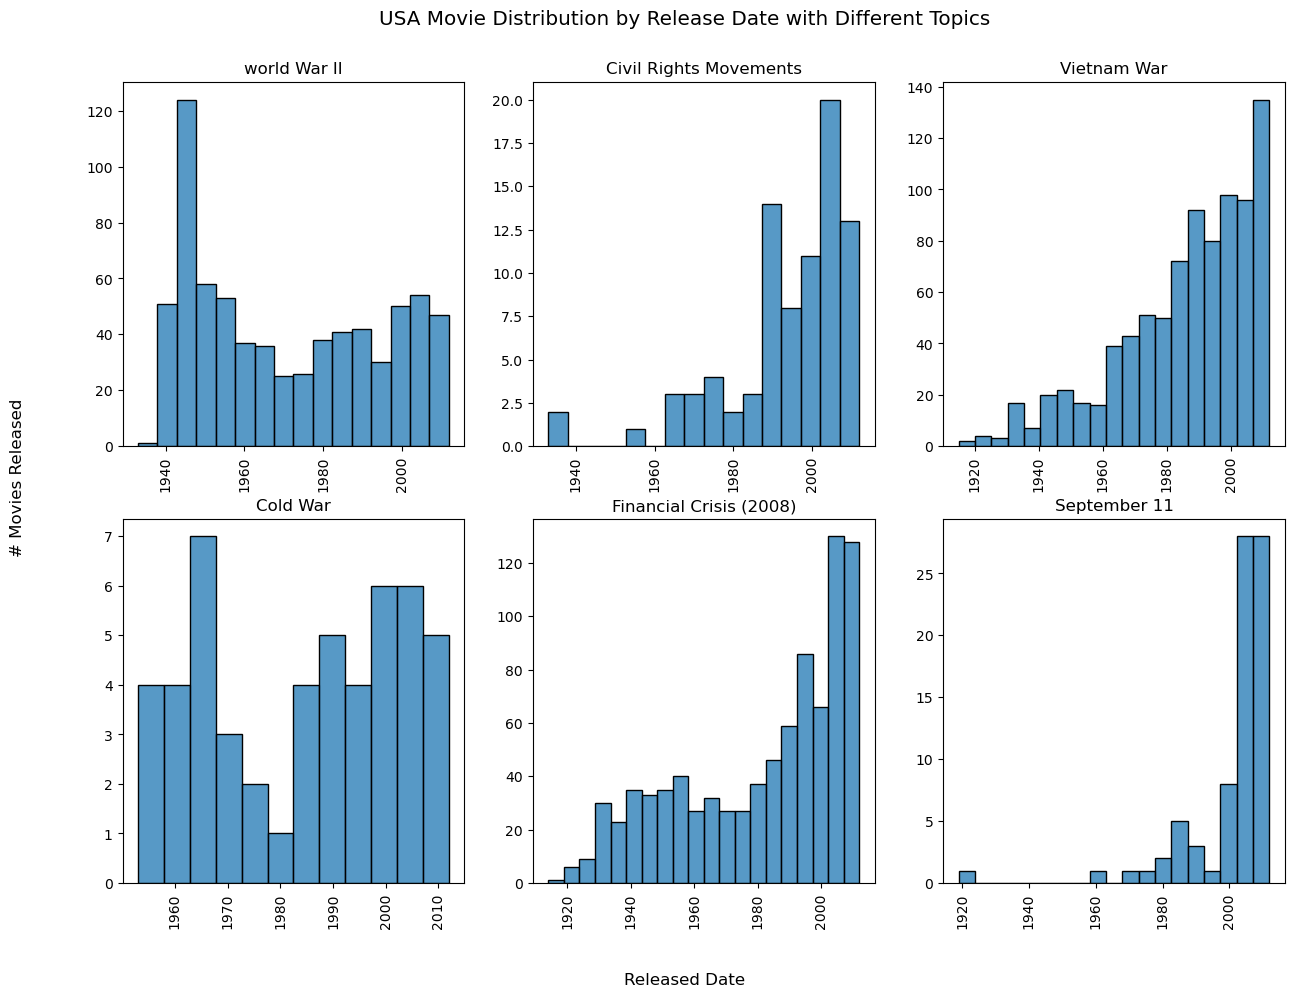

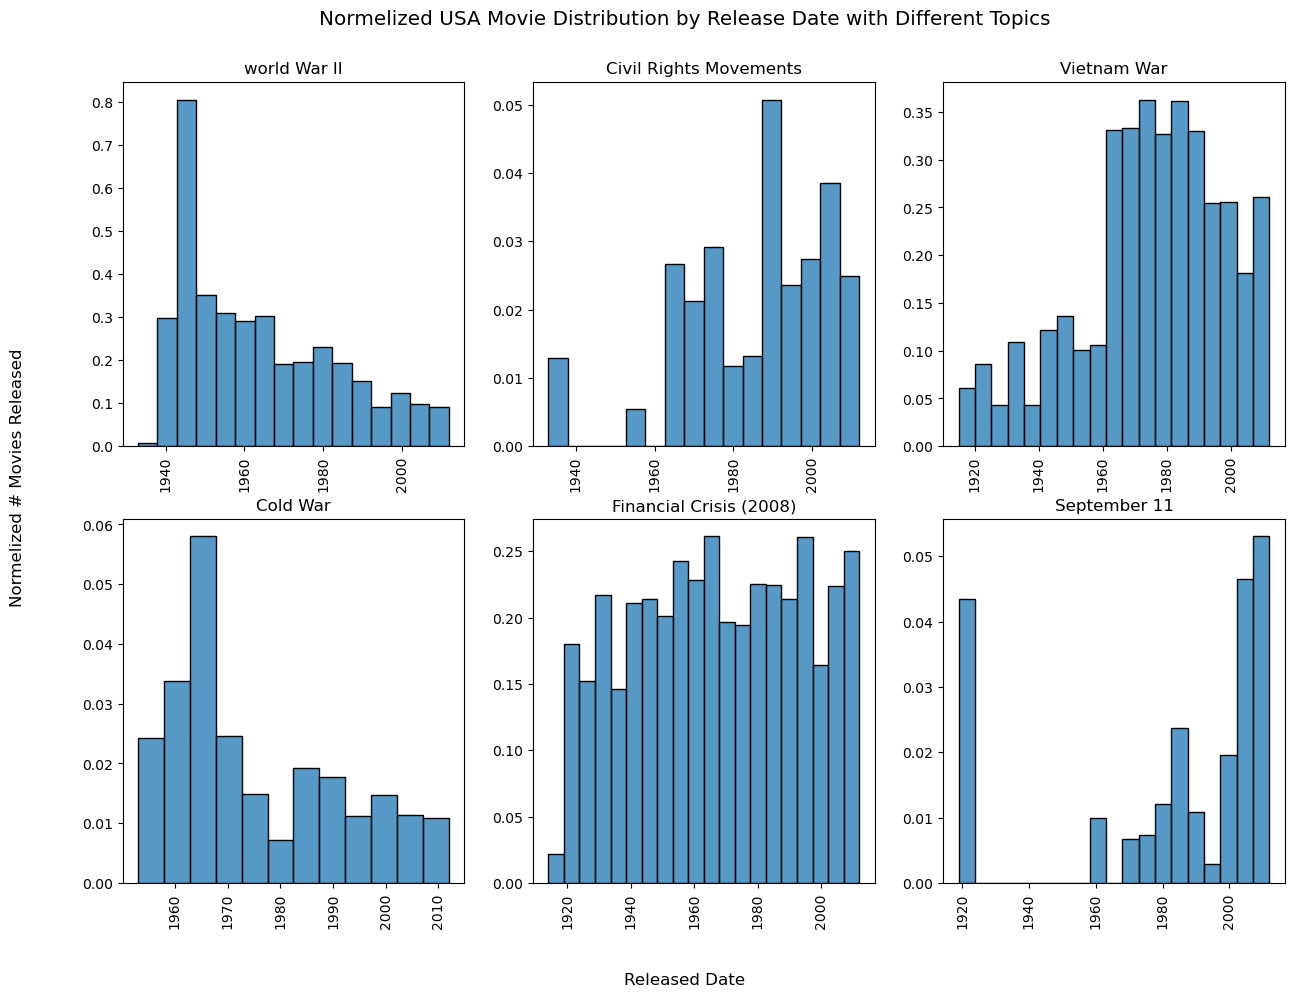

In [26]:
# focus now movies on which USA is involved and consider some events
USA_date_plot_weight_dict = dw.dict_USA_date_plot_weight(movies_clean_df)
dw.hist_event_USA_plots(event_date_df) 
dw.hist_event_USA_plots(event_date_df, normelized = True, dict_weight = USA_date_plot_weight_dict)


In [41]:
economic_theme =  ["Business", "Finance", "Investing",  'poverty', 'Economic collapse', 'Unemployment', 'jobless','Inflation','Stock market','Bankruptcy','Debt']
pattern = '|'.join(economic_theme)
economic_theme_movies_count = len(movies_clean_df[movies_clean_df['plot'].str.contains(pattern, case=False, na=False)])
economic_theme_USA_movies_count = len(movies_clean_df[(movies_clean_df['plot'].str.contains(pattern, case=False, na=False)) & (movies_clean_df['country'].str.contains('United States of America', na=False))])
print(f'The number of films with economic struggle themes in their plot is: {economic_theme_movies_count}')
print(f'The number of american films with economic themes in their plot is: {economic_theme_USA_movies_count}')

The number of films with economic struggle themes in their plot is: 4865
The number of american films with economic themes in their plot is: 2483


c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_country_event_date_df['country'] = economic_country_event_date_df['country'].str.split(', ')
c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_country_event_date_df['country'] = economic_country_event_dat

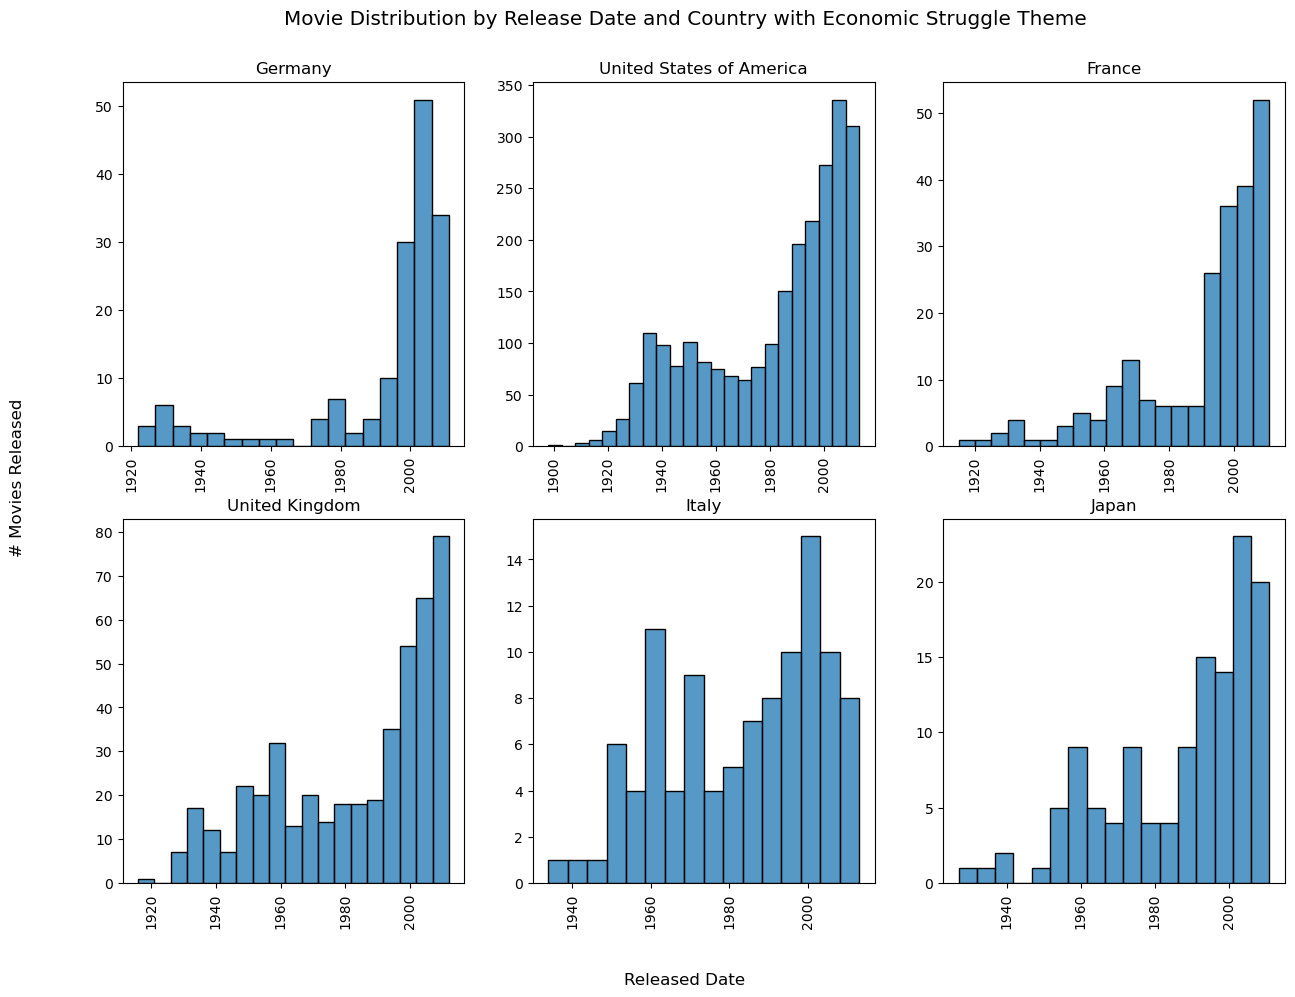

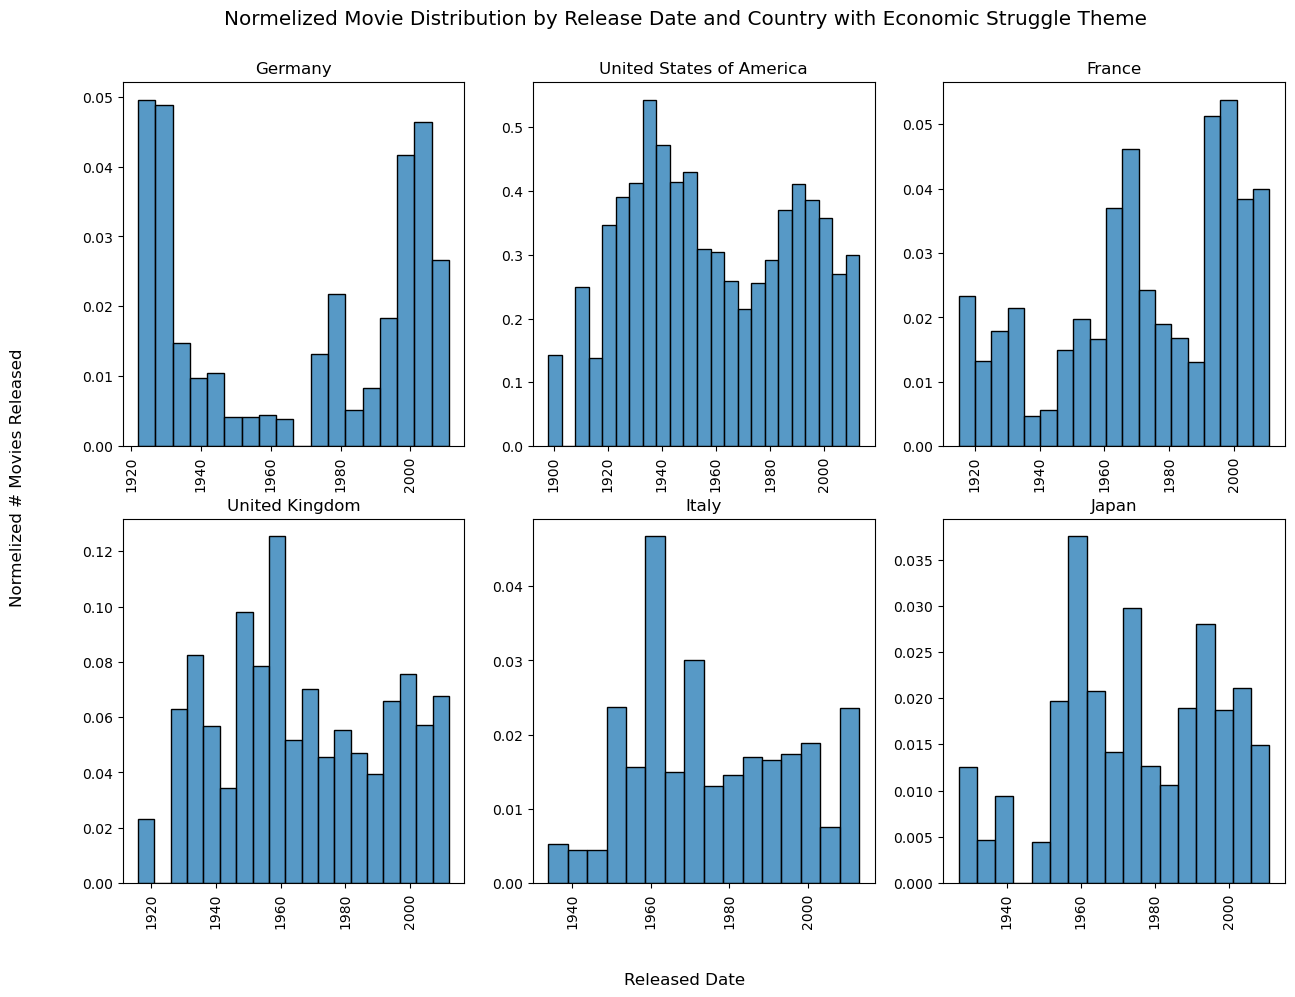

In [27]:
# Economic Struggle
dw.hist_economic_event_date_plots(event_date_df)
dw.hist_economic_event_date_plots(event_date_df, normelized = True, dict_weight = country_plot_date_weight_dict)


In [42]:
social_themes = ["LGBT", "Gay", "Feminist", "Social problem", "Gay Interest", "Social issues", 'Law & Crime', 'racist', 'rights', 'oppression', 'protest', 'equality', 'revolution']
pattern = '|'.join(social_themes)
social_theme_movies_count = len(movies_clean_df[movies_clean_df['plot'].str.contains(pattern, case=False, na=False)])
social_theme_USA_movies_count = len(movies_clean_df[(movies_clean_df['plot'].str.contains(pattern, case=False, na=False)) & (movies_clean_df['country'].str.contains('United States of America', na=False))])
print(f'The number of films with social themes in their plot is: {social_theme_movies_count}')
print(f'The number of americans films with social themes in their plot is: {social_theme_USA_movies_count}')

The number of films with social themes in their plot is: 2662
The number of americans films with social themes in their plot is: 1413


c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_country_event_date_df['country'] = social_country_event_date_df['country'].str.split(', ')
c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2_3\git\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_country_event_date_df['country'] = social_country_event_date_df['co

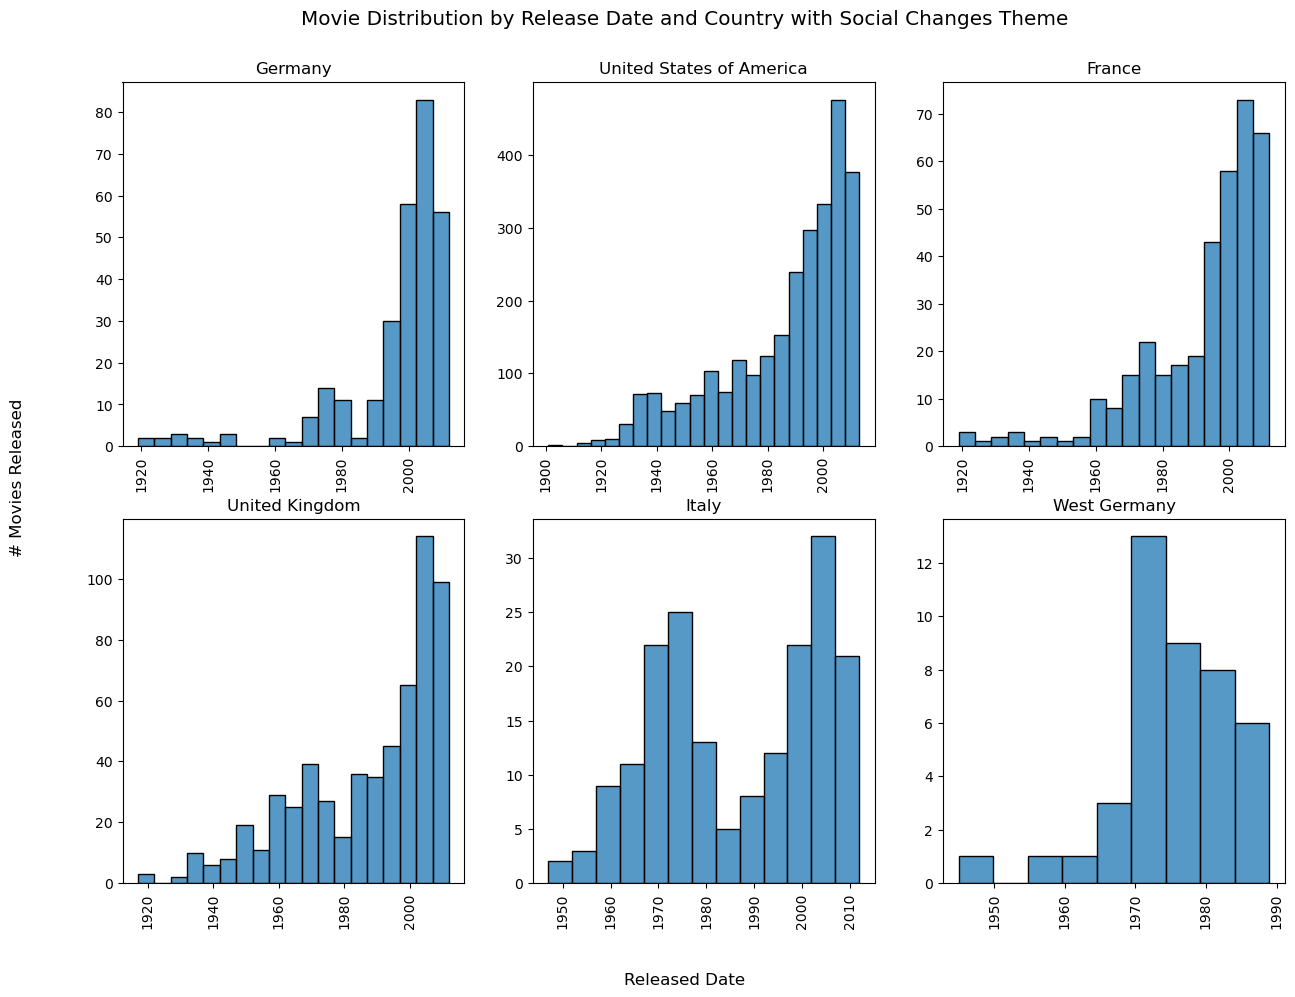

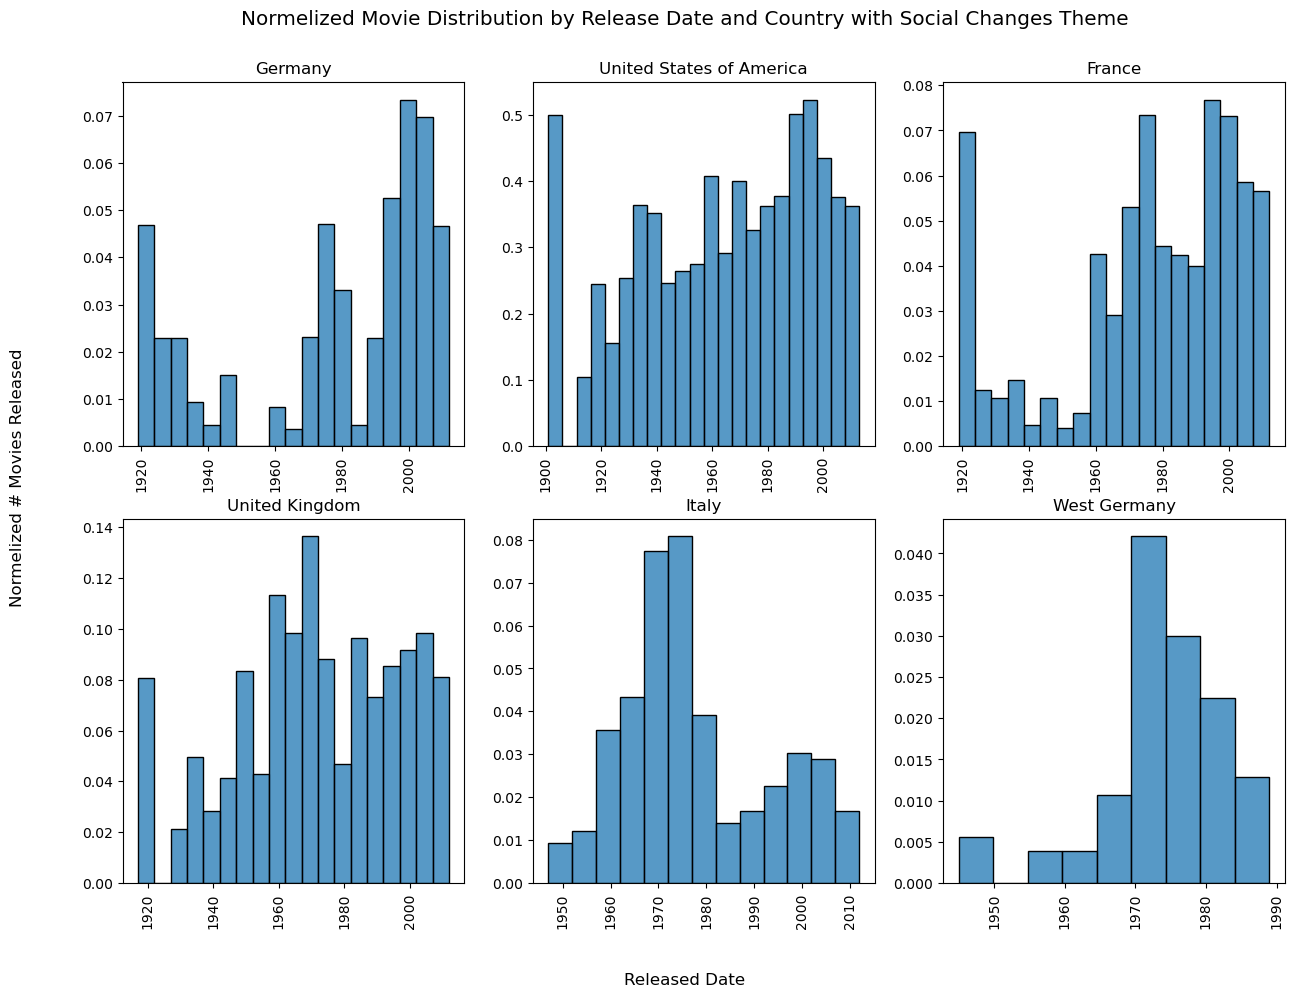

In [28]:
# social changes
country_plot_date_weight_dict
dw.hist_social_event_date_plots(event_date_df) 
dw.hist_social_event_date_plots(event_date_df, normelized = True, dict_weight = country_plot_date_weight_dict)

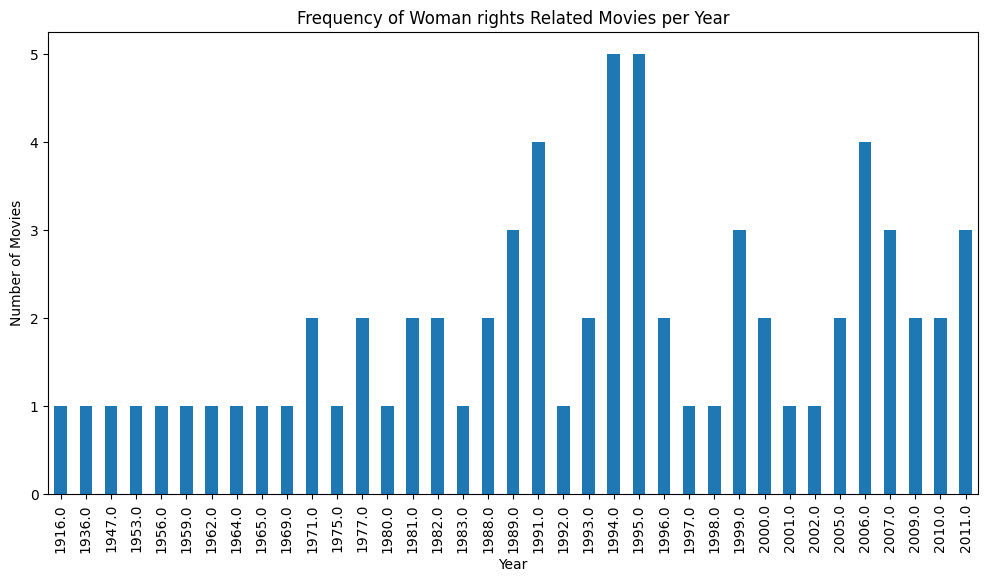

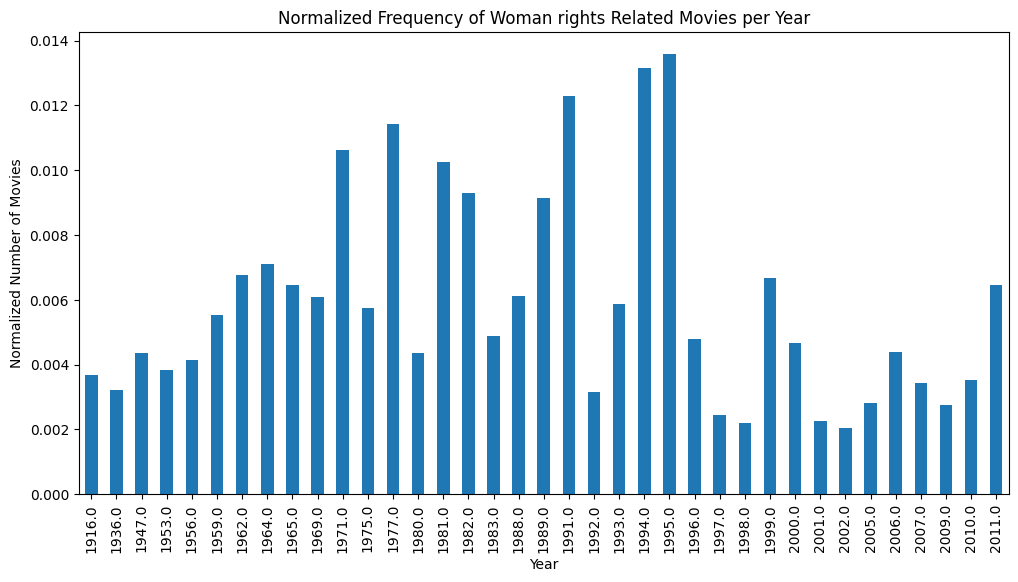

In [ ]:
dw.plot_woman_rights_movies(movies_clean_df)

In [48]:
movies_clean_df.shape

(81840, 8)

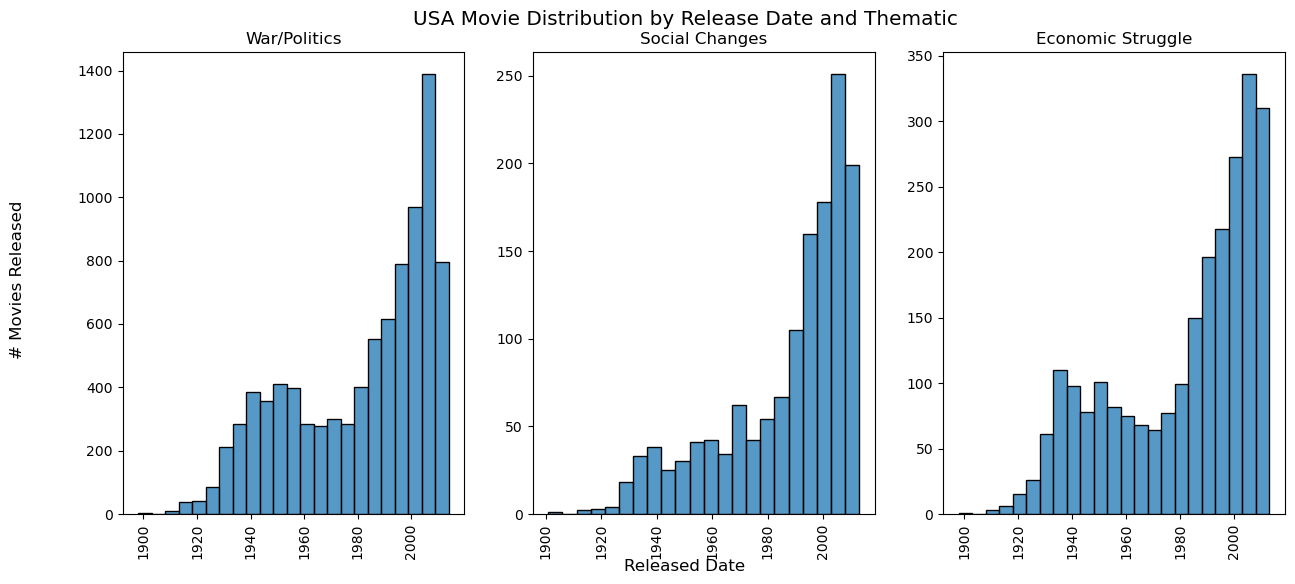

In [ ]:
# plot cluster selon le genre 
# dw.hist_USA_regrouped_genre_date_plot(event_date_df) # peut etre affiné la liste des mots surtout pour le war 
# ces graph en dessous sont deja present dans le notebook enft, --> c est les plots que je regarde le theme en fonction des 6 pays 


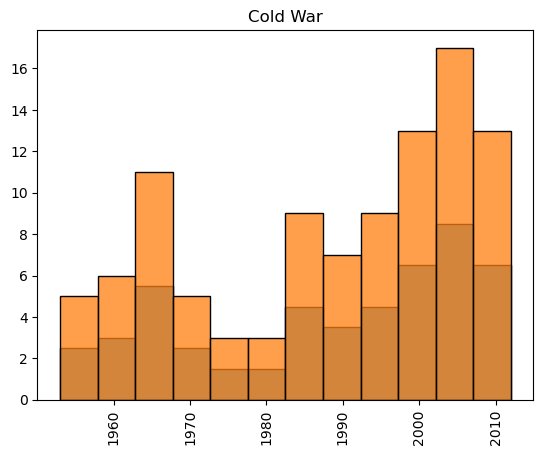

In [82]:
######### test poour la normalisation 

test_df = event_date_df
test_df['weights'] = 0.5
test_df

dw.hist_sub_plot(test_df,'release_date', 'plot',['Cold war', 'Iron Curtain', 'Arms Race', 'Space race', 'proxy wars', 'Berlin wall'], 'Cold War', weights= 'weights')
dw.hist_sub_plot(test_df,'release_date', 'plot',['Cold war', 'Iron Curtain', 'Arms Race', 'Space race', 'proxy wars', 'Berlin wall'], 'Cold War', weights= None)

## Text analysis

The following section shows our preliminary analysis of the plot summaries form the `plot_summaries.txt`file. We used the `nltk` library and the `Core-NLP` library for this task.

The first part of this text analysis with the `nltk`library is to vizualize and better understand the data we have.

In [153]:
# Import the summary data into a dataframe
summaries_df = ta.import_summaries_data("plot_summaries.txt")

# Tokenize all of the summaries
summary_tokens = ta.tokenize_summaries(summaries_df)

KeyboardInterrupt: 

The first element we considered after tokenizing the text is to try to understand how many tokens we have and get a first intuition of the distribution of tokens. 
We used $\text{lexical diversity} = \frac{\text{unique tokens}}{\text{total  tokens}}$ as a measure of the diversity of the vocabulary in the summaries. 

In [34]:
# Import the summary data into a dataframe
summaries_df = ta.import_summaries_data("plot_summaries.txt")

# Tokenize all of the summaries
summary_tokens = ta.tokenize_summaries(summaries_df)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


From the tokens we started with using a dispersion plot to visualize the frequency of some different key words in the summaries. This provides an initial over view of how frequent certain topics are in the films.

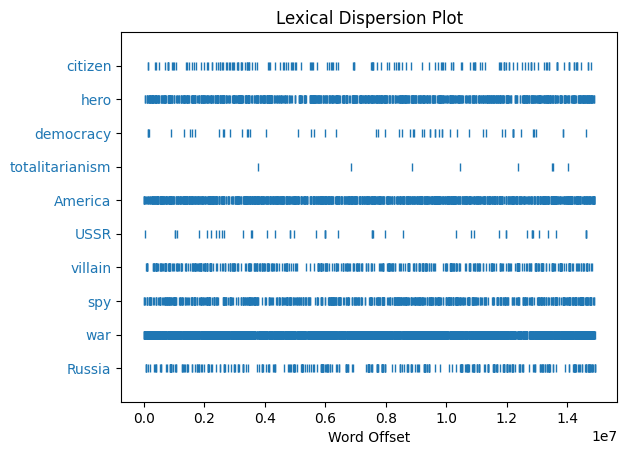

In [35]:
word_list = ["citizen", "hero", "democracy", "totalitarianism", "America", "USSR", "villain", "spy", 'war', "Russia"]
ta.dispersion_plot(summary_tokens, word_list)

This provides a first overview of how common certain words are and a first measure to compare the popularity of certain words. However, this is biased by the words we choose to plot.
We then decided to plot the most common tokens.

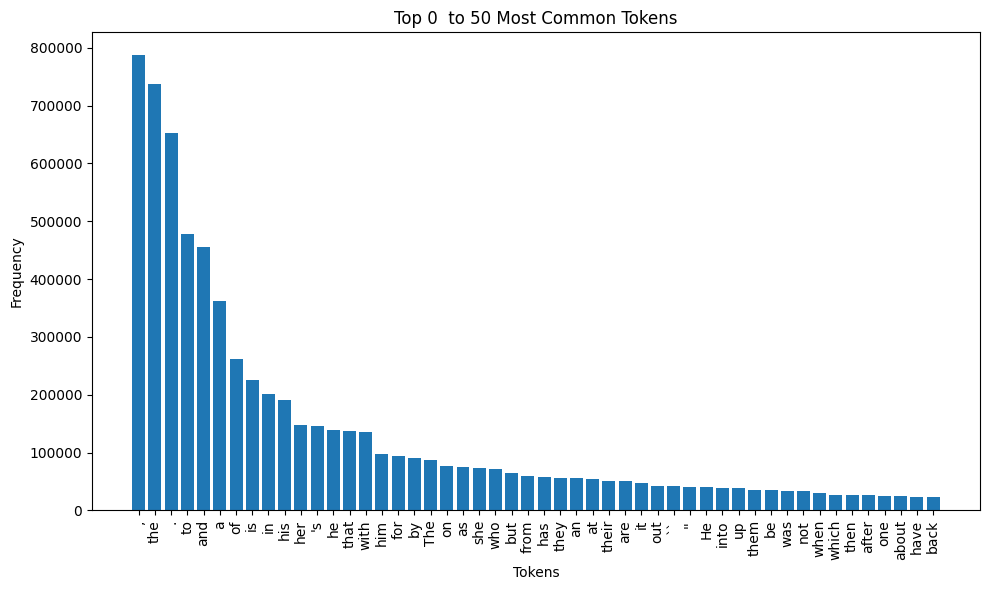

In [36]:
ta.plot_most_common(summary_tokens, 0, 50)

In this plot we see that the most common tokens are punctuation marks and helper words which to not provide much insight into the theme of a film. We then plot the fifty next most common words to see if any themes start to appear.

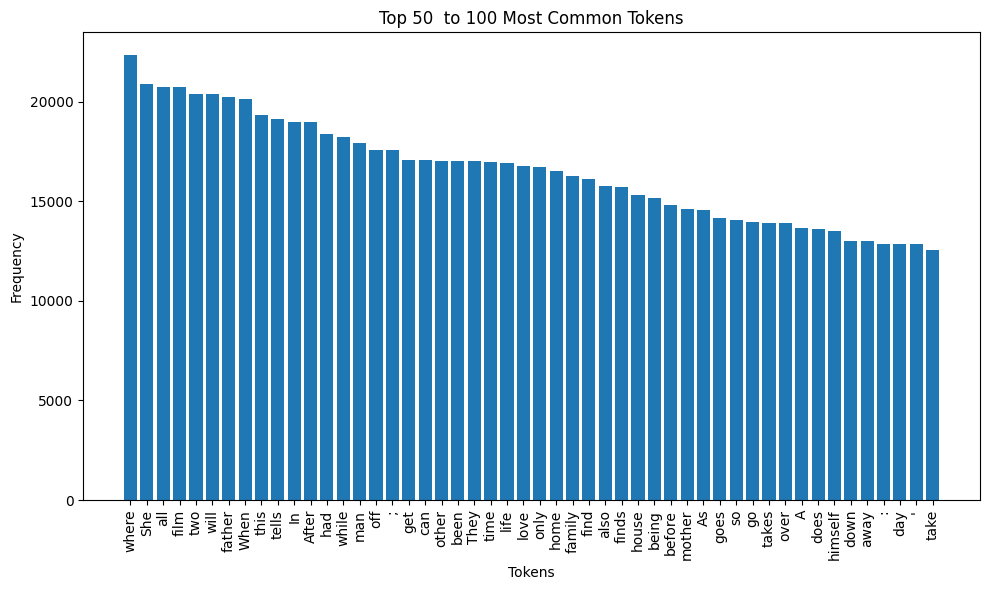

In [37]:
ta.plot_most_common(summary_tokens, 50, 100)

From this plot we see the words `father`, `time`,`life`, `love`, `home`, `family` and `mother`. This gives a first perspective into the most commons themes of movies such as family. 

This first analysis provides some insight into the most common words and themes in movies.
We have done this first overview with the plot summaries for all of the movies, however, we will apply this to smaller subsets of movies that correspond to certain time periods and certain countries to compare them. 

The next section of our analysis aims to identify personas within the movie summaries. We will use tools provided in the `StanfordCoreNLP` library for this. We developed our analysis process and tested it on the summary for a single film to reduce computational time and simplify the process.

The first function we implemented was to identify the characters mentionned in the plot summary

In [56]:
import os
os.getcwd()
ta.identify_personas("sample_plot.txt")

Current working directory: c:\Users\valbi\Desktop\Ma3\ADA\Projet1\ada-2024-project-spaghettisolution
Sorted named entities by count: [('Katniss', 19), ('Peeta', 10), ('Haymitch', 4), ('Rue', 4), ('Cato', 2), ('Crane', 2), ('Mellark', 1), ('Abernathy', 1), ('Caesar', 1), ('Flickerman', 1), ('Foxface', 1)]


Here we see that in the summary for the hunder games movie, the character that is mentionned the most is Katniss. We can reasonably assume that the caracters that appear the most often are the protagonists in the movie.

Now that we have identified the characters we would like to find the adjectives that are associated with each character

In [59]:
text = """The nation of Panem consists of a wealthy Capitol and twelve poorer districts. 
Katniss Everdeen, the main protagonist, is brave and resourceful. Peeta Mellark, a loyal and caring boy, is also a tribute. 
Haymitch Abernathy, their cynical and shrewd mentor, advises them to survive the games."""
entities_adj = ta.extract_entities_and_adjectives(text)

Entity: Everdeen, Adjectives: brave, resourceful, main
Entity: Katniss, Adjectives: brave, resourceful, main
Entity: Mellark, Adjectives: loyal, caring
Entity: Peeta, Adjectives: loyal, caring
Entity: Haymitch, Adjectives: cynical, shrewd
Entity: Abernathy, Adjectives: cynical, shrewd


In this example using a short plot summary, we get a list of the adjectives for each character. However, our model doesn't recognize that `Katniss Everdeen`is one name and not two. This is one of the limitations of this method of identifying the personnas. 

Now that we have the adjectives associated with each persona, we wish to identify the verbs associated with them. 

In [60]:
entities_vrb = ta.extract_entities_and_verbs(text)

Entity: Everdeen, Verbs: is
Entity: Katniss, Verbs: is
Entity: Mellark, Verbs: is
Entity: Peeta, Verbs: is
Entity: Haymitch, Verbs: advises, survive
Entity: Abernathy, Verbs: advises, survive


This analysis of the verbs associated with each persona helps understand the persona. 
However for a large number of summaries, going through the adjectives and verbs associated with each persona to classify them as heros or villains is a very time consumming task. The next function we implemented is one to categorize the caracters as `good`, `bad`or `neutral`.

In [61]:
ta.extract_entity_sentiment(text)

Overall Sentiment Percentages:
Good: 60.00%
Neutral: 40.00%
Bad: 0.00%

Individual Sentiment Percentages:
Entity: Everdeen
  Good: 100.00%
  Neutral: 0.00%
  Bad: 0.00%
Entity: Katniss
  Good: 100.00%
  Neutral: 0.00%
  Bad: 0.00%
Entity: Mellark
  Good: 100.00%
  Neutral: 0.00%
  Bad: 0.00%
Entity: Peeta
  Good: 100.00%
  Neutral: 0.00%
  Bad: 0.00%
Entity: Haymitch
  Good: 0.00%
  Neutral: 100.00%
  Bad: 0.00%
Entity: Abernathy
  Good: 0.00%
  Neutral: 100.00%
  Bad: 0.00%


In [7]:
file_path = r'data\raw_data\plot_summaries.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    content = file.readlines()
    
# Select random films from the content
random_films = random.sample(content, 1)

In [9]:
for film in random_films:
    entities_adjectives_corefV2 = ta.extract_entities_and_related_words_with_coref(film)
    print("\nFilm:")
    print(film)

    print("\nAdjectives and verbs CorefV2:")
    for entity, adj_list in entities_adjectives_corefV2.items():
        print(f"Entity: {entity}, Adjectives: {', '.join(adj_list)}")




Film:
2471946	A Hollywood film composer is found dead. The police think it is suicide but a cop, Joe Warne , suspects murder. Warne begins looking for "Dolores," a name in a song by the dead man. While investigating, Warne finds out the dead man has had a list of models as girlfriends and that ten of them have a motive for the suspected murder. His ruthless questioning tactics lead to several suspects reporting him for abuse. Pursuing the case with dogged determination, the obsessed Warne is eventually suspended from the police force while on the case. As he digs deeper into the case, the clues draw him closer to Frances Ransom , who may be involved in the killing.


Adjectives and verbs CorefV2:
Entity: Joe Warne, Adjectives: obsessed, begins, finds


In [10]:
war_action_movies_df = ta.prepare_persona_data(genres_filter='war|action',title='war_action')

c:\Users\valbi\Desktop\Ma3\ADA\Projet1\ada-2024-project-spaghettisolution\src\scripts\text_analysis.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_df['Persona'] = None


NEXT CELLS TAKE SEVERAL HOURS TO RUN

In [ ]:
war_action_movies_df = pd.read_csv('data\cleaned_data\war_action_movies_data.csv')
war_action_movies_df = ta.process_personas_movies(war_action_movies_df)
war_action_movies_df.to_csv('data\cleaned_data\war_action_movies_data.csv', index=False)

In [4]:
USA_movies_df = ta.prepare_persona_data(genres_filter="", country_filter='United States of America', title='USA')

c:\Users\valbi\Desktop\Ma3\ADA\Projet1\ada-2024-project-spaghettisolution\src\scripts\text_analysis.py:392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies_df["Persona"] = None


SEVERAL HOURS ALSO

In [5]:
USA_movies_df = ta.process_personas_movies(USA_movies_df)
USA_movies_df.to_csv(f'data/cleaned_data/USA_movies_with_persona.csv', index=False)

Processing 1/34408


KeyboardInterrupt: 

In [4]:
dfkaggle = pd.read_csv(r'data/raw_data/kaggleData/wiki_movie_plots_deduped.csv')

In [5]:
filtered_df = dfkaggle[(dfkaggle['Origin/Ethnicity'] == 'American') & 
                       (dfkaggle['Genre'].str.contains('Action|War', case=False, na=False))]
filtered_df.columns = map(str.lower, filtered_df.columns)
filtered_df.head()

,release year,title,origin/ethnicity,director,cast,genre,wiki page,plot
11,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,short action/crime western,https://en.wikipedia.org/wiki/From_Leadville_t...,The film features a train traveling through th...
130,1916,"20,000 Leagues Under the Sea",American,Stuart Paton,"Lois Alexander, Curtis Benton, Wallace Clarke,...",action adventure,"https://en.wikipedia.org/wiki/20,000_Leagues_U...","A strange giant ""sea creature"" has been rampag..."
174,1917,The Little American,American,Cecil B. DeMille,Mary Pickford,war drama,https://en.wikipedia.org/wiki/The_Little_American,Karl Von Austreim (Jack Holt) lives in America...
213,1918,The Great Love,American,D.W. Griffith,"George Fawcett, Lilian Gish",war drama,https://en.wikipedia.org/wiki/The_Great_Love_(...,"As described in a film magazine,[5] Jim Young ..."
214,1918,The Greatest Thing in Life,American,D.W. Griffith,"Robert Harron, Lillian Gish",war drama,https://en.wikipedia.org/wiki/The_Greatest_Thi...,"As described in a film magazine,[6] Leo Peret ..."


In [ ]:
filtered_df = ta.process_personas_movies(filtered_df)
filtered_df.to_csv(f'/data/clean_data/american_action_war_kaggle_with_persons', index=False)

Processing 1/1209


In [ ]:
filtered_df = pd.read_csv('data/cleaned_data/american_action_war_kaggle_with_persons.csv')

In [ ]:
dfwar_action = pd.read_csv('data/cleaned_data/war_action_movies_with_persona.csv')


In [ ]:
filtered_titles_years = set(zip(filtered_df['Title'], filtered_df['Release Year']))
war_action_titles_years = set(zip(dfwar_action['name'].str.split(',').str[0], dfwar_action['release_date']))

common_titles_years = filtered_titles_years.intersection(war_action_titles_years)

not_common_titles_years = filtered_titles_years.symmetric_difference(war_action_titles_years)



dfwar_action_copy = dfwar_action.copy()

for index, row in filtered_df.iterrows():
    title = row['Title']
    release_year = row['Release Year']
    if (title, release_year) in common_titles_years:
        war_action_index = dfwar_action_copy[(dfwar_action_copy['name'].str.contains(title)) & (dfwar_action_copy['release_date'] == release_year)].index
        if not war_action_index.empty:
            # Update the plot and persona in dfwar_action_copy only if Persona is not empty
            if row['Persona'] != '{}':
                dfwar_action_copy.at[war_action_index[0], 'plot'] = row['Plot']
                dfwar_action_copy.at[war_action_index[0], 'Persona'] = row['Persona']
    else:
        new_row = pd.DataFrame([{
            'name': row['Title'],
            'country': row['Origin/Ethnicity'],
            'genres': row['Genre'],
            'plot': row['Plot'],
            'Persona': row['Persona']
        }])
        dfwar_action_copy = pd.concat([dfwar_action_copy, new_row], ignore_index=True)

dfwar_action_copy.to_csv('data/cleaned_data/updated_war_action_movies_with_persons.csv', index=False)

## Clustering of personas

In [6]:
# read in the dataframes with the results of the  persona extraction
personas_df = pd.read_csv(r"data\cleaned_data\updated_war_action_movies_with_persons.csv")


In [7]:
personas_df = ta.split_personas(personas_df)

In [8]:
# apply filters to select only certain movies
personas_df = personas_df[
    personas_df["country"].str.contains("United States of America", na=False)
]

In [ ]:
lda_results = ta.run_lda(personas_df, 20)

topic_word_distribution = lda_results["topic_word_distribution"]

for index, top_words in topic_word_distribution.items():
    print(f"Topic {index}: {', '.join(top_words)}")
    with open('data/cleaned_data/topics.txt', 'w') as f:
        for index, top_words in topic_word_distribution.items():
            f.write(f"Topic {index}: {', '.join(top_words)}\n")

C:\Users\valbi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Topic 0: run, persuades, demands, carries, person, encounter, kills, tries, wounded, wants
Topic 1: agree, calls, american, threatens, leaves, holds, tells, realize, track, meets
Topic 2: comes, runs, tells, knocks, goes, finds, agent, kills, decides, takes
Topic 3: begin, tells, urges, finds, lives, offers, investigating, escaped, told, takes
Topic 4: reveals, saves, discover, infiltrate, learn, having, survives, fall, warns, picks
Topic 5: meet, plan, pursue, opens, manage, gives, end, speaks, lost, kill
Topic 6: decide, begins, try, suggests, follow, working, proposes, arrives, blows, breaks
Topic 7: save, crashes, come, corrupt, invites, catch, tries, stole, instructs, allows
Topic 8: set, trying, finds, marries, kisses, leave, tracks, responsible, visit, vows
Topic 9: shoots, kills, escape, alive, joins, flees, finds, tries, pulls, steals
Topic 10: named, appears, join, assumes, beautiful, depart, betrays, provides, needs, reveals
Topic 11: falls, arrive, remains, fails, free, fin

In [10]:
personas_df["topic"] = None

ta.match_personas_topic(personas_df, lda_results["tfidf"], lda_results["lda_model"])


## Analysis of the topics around some importants events


In [41]:
summaries_war3 = pd.read_csv("data/cleaned_data/updated_war_action_movies_with_person_topics.csv")
summaries_war3.dropna(subset=['release_date'], inplace=True)
summaries_war3 = summaries_war3[summaries_war3['country'] == 'United States of America']
summaries_war3.shape


(9782, 11)

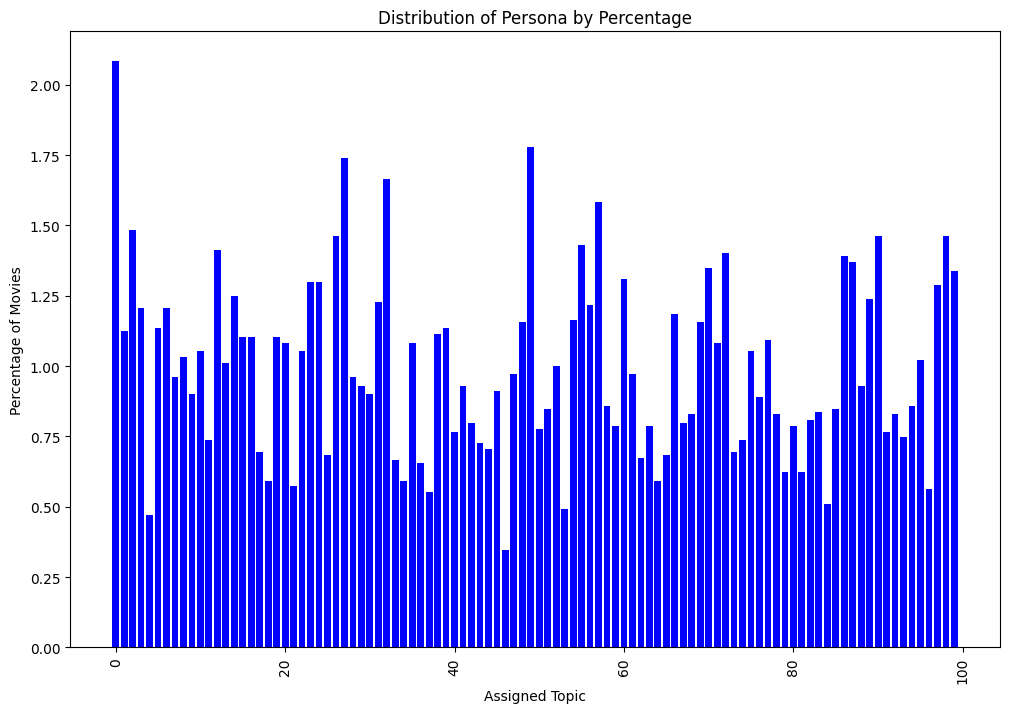

In [42]:
topic_counts = summaries_war3['assigned_topic'].value_counts().sort_index()
topic_percentages = (topic_counts / topic_counts.sum()) * 100

plt.figure(figsize=(12, 8))
plt.bar(topic_percentages.index, topic_percentages.values, color='blue')
plt.xlabel('Assigned Topic')
plt.ylabel('Percentage of Movies')
plt.title('Distribution of Persona by Percentage')
plt.xticks(rotation=90)
plt.show()

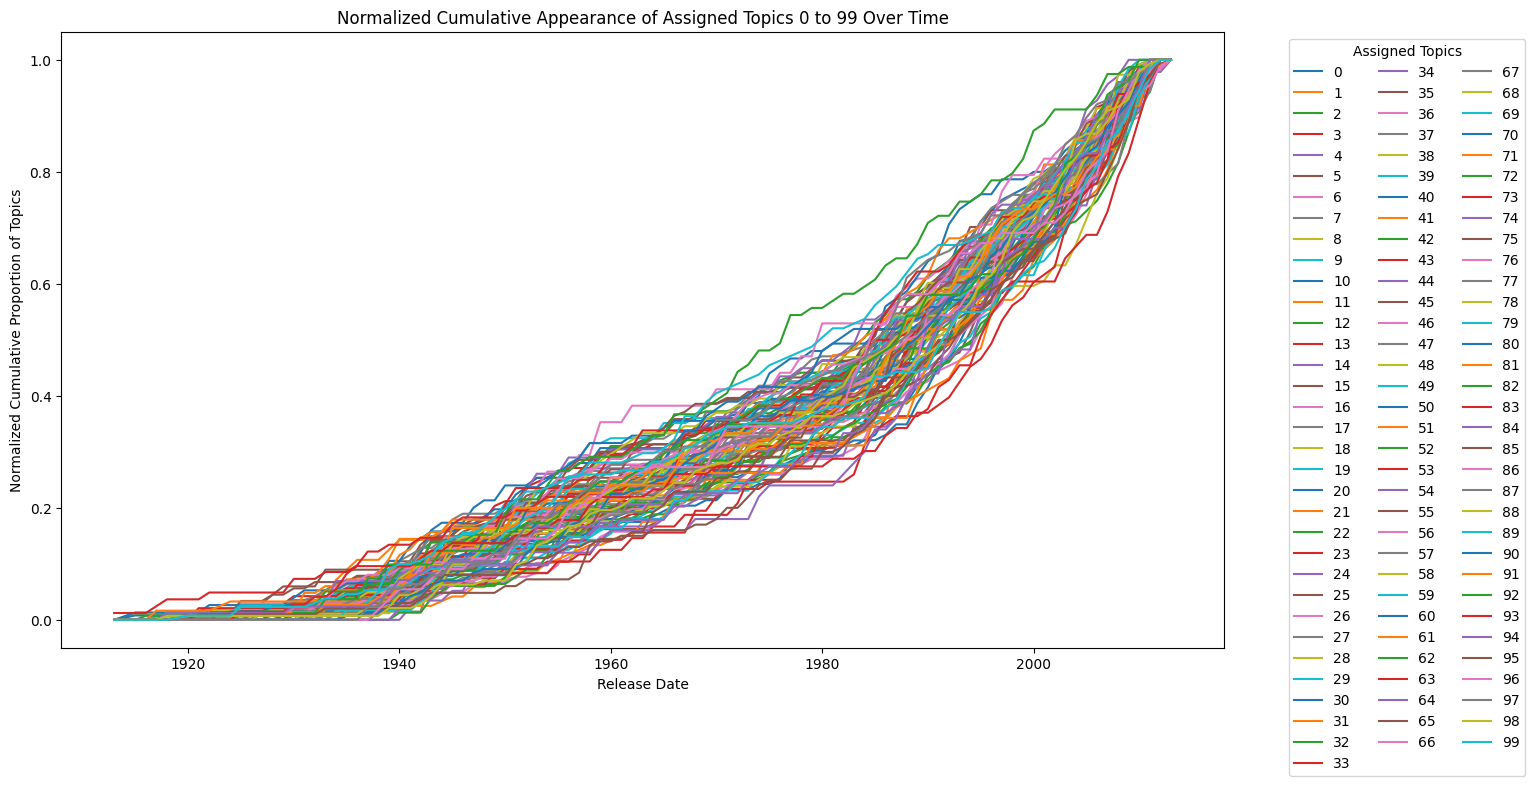

In [50]:
topic_evolution = summaries_war3.pivot_table(index='release_date', columns='assigned_topic', aggfunc='size', fill_value=0)

ta.plot_topic_evolution(0, 99, topic_evolution=topic_evolution)


In [51]:

war_action_movies_df = pd.read_csv('data/cleaned_data/war_action_movies_data.csv')

war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
war_action_movies_df = war_action_movies_df[war_action_movies_df['country'].str.contains('united states of america', case=False, na=False)]


C:\Users\valbi\AppData\Local\Temp\ipykernel_27776\730612660.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


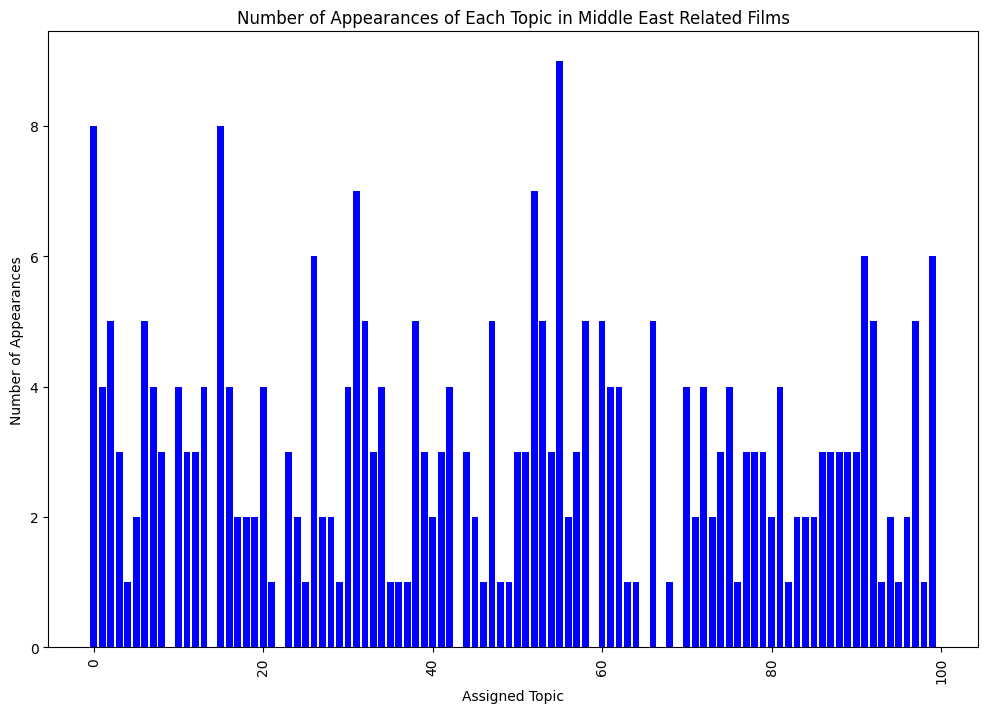

In [55]:
keywords = ['iran', 'iraq', 'afghanistan', 'syria', 'arabic', 'middle east']
middle_east_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.contains('|'.join(keywords), case=False, na=False)]

middle_east_related_summaries = summaries_war3[summaries_war3['name'].str.lower().isin(middle_east_related_movies_df['name'])]

# Count the number of appearances of each topic in the filtered dataframe
middle_east_topic_counts = middle_east_related_summaries['assigned_topic'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(middle_east_topic_counts.index, middle_east_topic_counts.values, color='blue')
plt.xlabel('Assigned Topic')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances of Each Topic in Middle East Related Films')
plt.xticks(rotation=90)
plt.show()

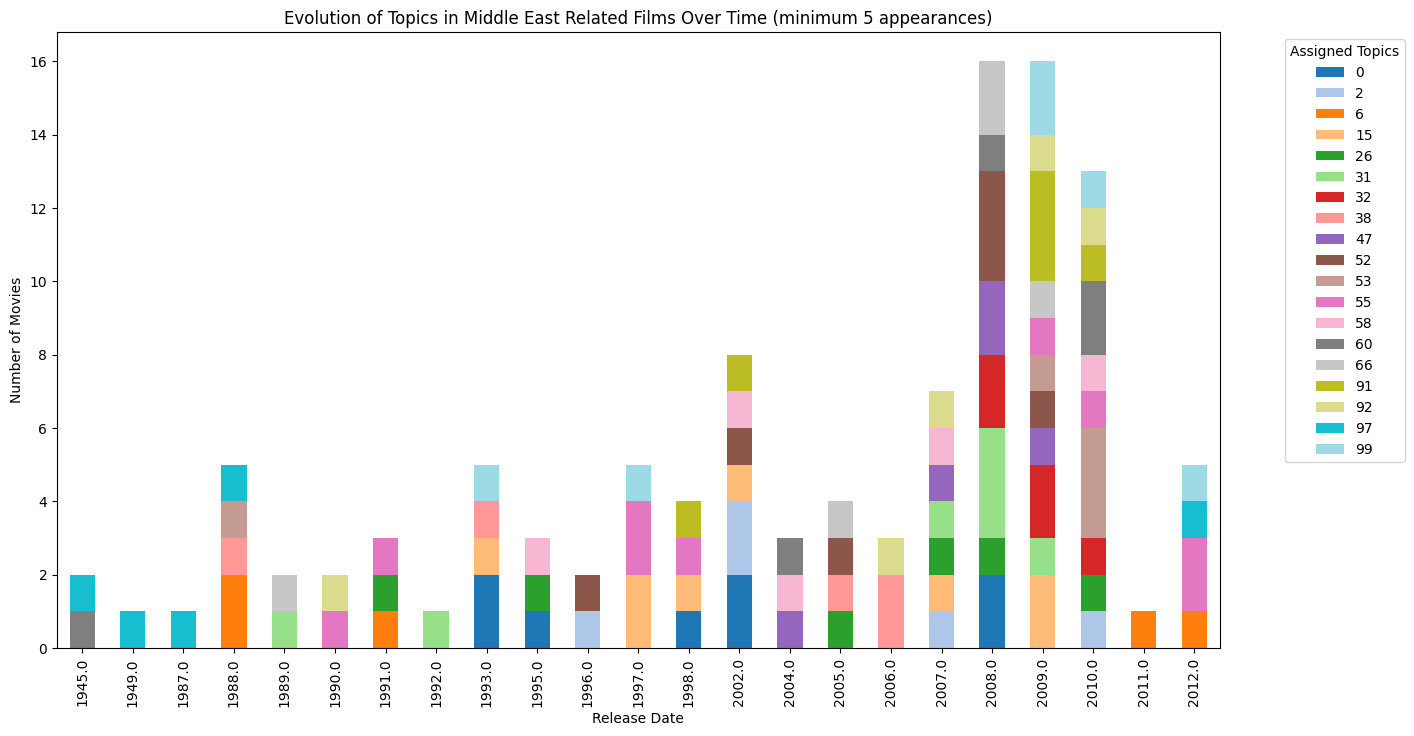

In [56]:
sns.set_palette("tab20")

filtered_topics = middle_east_topic_counts[middle_east_topic_counts >= 5].index

filtered_topic_evolution = middle_east_related_summaries[middle_east_related_summaries['assigned_topic'].isin(filtered_topics)]
filtered_topic_evolution = filtered_topic_evolution.pivot_table(index='release_date', columns='assigned_topic', aggfunc='size', fill_value=0)

filtered_topic_evolution.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.title('Evolution of Topics in Middle East Related Films Over Time (minimum 5 appearances)')
plt.legend(title='Assigned Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

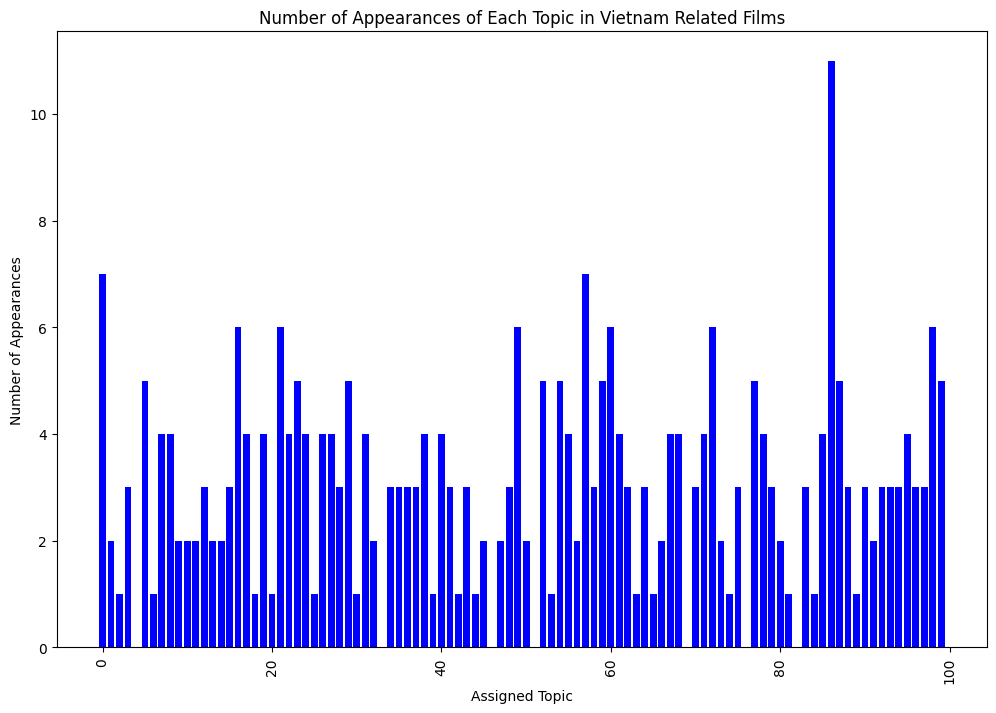

In [57]:
keywords = ['vietnam', 'viet cong', 'saigon', 'hanoi', 'vietminh']
vietnam_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.contains('|'.join(keywords), case=False, na=False)]
vietnam_related_summaries = summaries_war3[summaries_war3['name'].str.lower().isin(vietnam_related_movies_df['name'])]

vietnam_topic_counts = vietnam_related_summaries['assigned_topic'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.bar(vietnam_topic_counts.index, vietnam_topic_counts.values, color='blue')
plt.xlabel('Assigned Topic')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances of Each Topic in Vietnam Related Films')
plt.xticks(rotation=90)
plt.show()

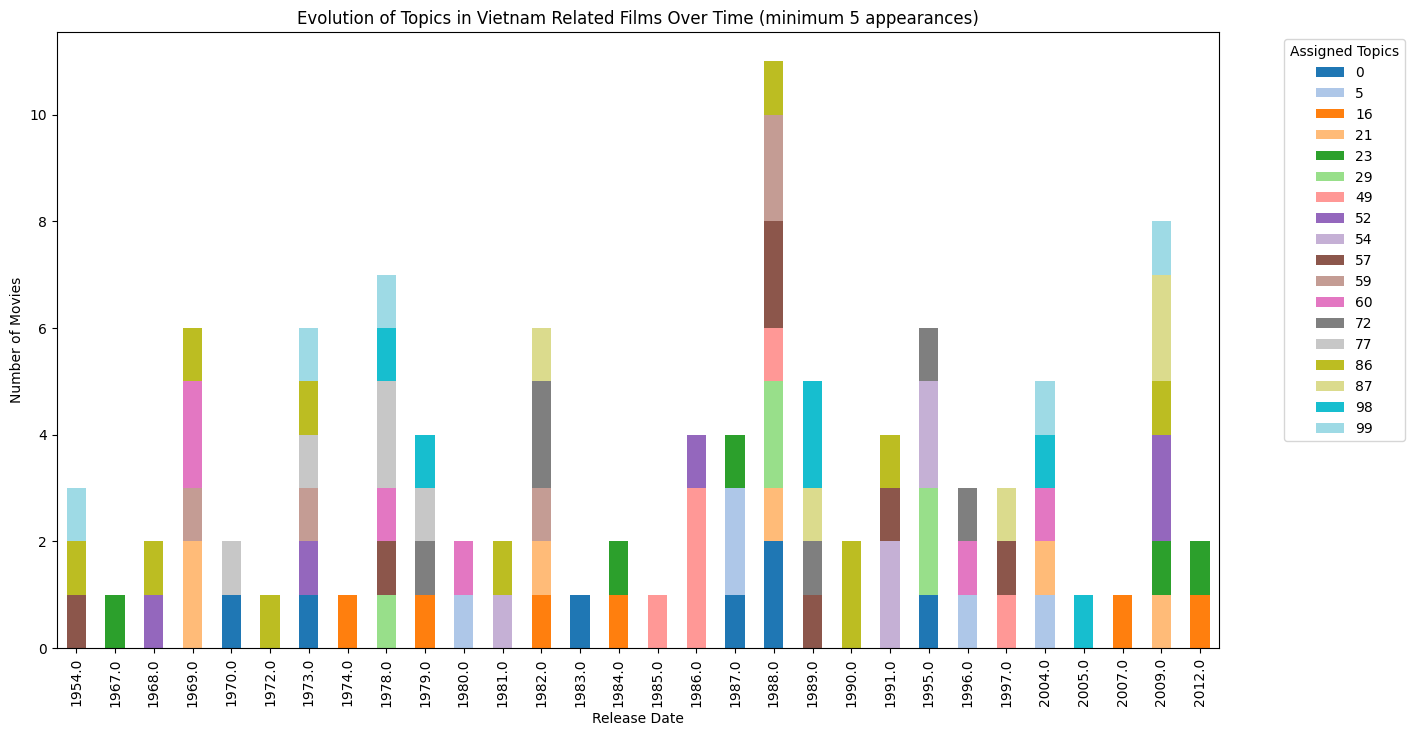

In [58]:
sns.set_palette("tab20")

filtered_topics = vietnam_topic_counts[vietnam_topic_counts >= 5].index

filtered_topic_evolution = vietnam_related_summaries[vietnam_related_summaries['assigned_topic'].isin(filtered_topics)]
filtered_topic_evolution = filtered_topic_evolution.pivot_table(index='release_date', columns='assigned_topic', aggfunc='size', fill_value=0)

filtered_topic_evolution.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.title('Evolution of Topics in Vietnam Related Films Over Time (minimum 5 appearances)')
plt.legend(title='Assigned Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [59]:
most_present_topic = vietnam_topic_counts.idxmax()
most_present_topic_count = vietnam_topic_counts.max()

print(f"The most present topic in Vietnam-related films is topic {most_present_topic} with {most_present_topic_count} appearances.")

The most present topic in Vietnam-related films is topic 86 with 11 appearances.


In [60]:
most_present_topic_vietnam_films = vietnam_related_summaries[vietnam_related_summaries['assigned_topic'] == most_present_topic]
most_present_topic_vietnam_films

,name,release_date,revenue,runtime,languages,country,genres,plot,persona,actions_clean,assigned_topic
2982,For the Boys,1991.0,23202444.0,146.0,English,United States of America,"Romantic comedy, Comedy-drama, Period piece, D...","In the early 1990s, retired entertainer Dixie ...",Sparks,sparks partner,86
3983,The Green Berets,1968.0,21707027.0,141.0,"Vietnamese , English",United States of America,"Combat Films, Drama, War film","At Fort Bragg, cynical newspaper reporter Geor...",Petersen,scrounging befriends,86
5797,Bustin' Loose,1981.0,NaN,94.0,English,United States of America,"Action/Adventure, Action, Comedy",Joe Braxton is a convict who violates his par...,Vivian,get planned lose prostitute decides gets secur...,86
6561,Men at Work,1990.0,16247964.0,99.0,English,United States of America,"Thriller, Action/Adventure, Action, Comedy",Carl Taylor and James St. James are a pair o...,James St. James,end hide ask seem garbagemen,86
6563,Men at Work,1990.0,16247964.0,99.0,English,United States of America,"Thriller, Action/Adventure, Action, Comedy",Carl Taylor and James St. James are a pair o...,Carl Taylor,shoots goes hide ask seem laugh manage,86
7451,X-Men Origins: Wolverine,2009.0,373062864.0,107.0,English,United States of America,"Thriller, Action Thrillers, Science Fiction, S...","In 1845, James Howlett, a young boy living in ...",Scott Summers,declines working falls father kills situation,86
7590,The Presidio,1988.0,20036242.0,97.0,English,United States of America,"Crime Fiction, Thriller, Mystery, Drama, Suspe...","At the Presidio Army base in San Francisco, MP...",Maclure,drive surprises comes retired attacked had sav...,86
7633,Skyjacked,1972.0,NaN,100.0,English,United States of America,"Disaster, Thriller, Action Thrillers, Action, ...",{{plot}} Global Airways Flight 502—using a Boe...,O'Hara,changes goes survives separated love lowers lo...,86
10084,"20,000 Leagues Under the Sea",1954.0,11267000.0,122.0,English,United States of America,"Science Fiction, Adventure, Action/Adventure, ...","In the year 1868, rumors of a sea monster atta...",Nemo,recognizes looks taking claims sees goes finds...,86
20694,Lost Flight,1969.0,NaN,104.0,English,United States of America,"Action, Drama",Captain Steve Bannerman has been asked to fly...,Steve Bannerman,rejects takes crashes,86


In [61]:
most_present_topic_all_films = summaries_war3[summaries_war3['assigned_topic'] == most_present_topic]
most_present_topic_all_films.head(20)

,name,release_date,revenue,runtime,languages,country,genres,plot,persona,actions_clean,assigned_topic
174,The Magnificent Seven,1960.0,NaN,128.0,"English , Spanish",United States of America,"Action/Adventure, Western, Drama",A Mexican village is periodically raided for f...,Calvera,realizes sustain arrive promised fears asks sp...,86
284,Star Wars Episode II: Attack of the Clones,2002.0,649398328.0,142.0,English,United States of America,"Science Fiction, Adventure, Space opera, Fanta...",The Galactic Republic is in turmoil. Followin...,Mace Windu,appear kills lead,86
308,Star Wars Episode V: The Empire Strikes Back,1980.0,538375067.0,124.0,English,United States of America,"Science Fiction, Adventure, Space opera, Fanta...",The film begins with an opening crawl explain...,Leia Lando Han Leia,hide arrive need late flee wait,86
315,Indiana Jones and the Raiders of the Lost Ark,1981.0,389925971.0,115.0,"Arabic , Nepali , Spanish , Hebrew , English ,...",United States of America,"Adventure, Costume Adventure, Action/Adventure...","In 1936, archaeologist Indiana Jones braves an...",Marion,accompany steal arrive calls meet leave diggin...,86
393,The Sting,1973.0,159616327.0,129.0,English,United States of America,"Crime Fiction, Buddy film, Gangster Film, Peri...","Johnny Hooker, a grifter from Depression-era J...",Kelly,hooker reveals,86
499,The Caine Mutiny,1954.0,8700000.0,123.0,English,United States of America,"Courtroom Drama, Drama, War film",Newly commissioned Ensign Willie Keith (Robert...,Maryk,starts urges take rejects face asks relieves,86
518,True Lies,1994.0,378882411.0,141.0,"French , Arabic , German , English",United States of America,"Thriller, Action Comedy, Action Thrillers, Gla...",Harry Tasker leads a double life: to his wife ...,Dana,steal flee,86
913,Spider-Man,2002.0,821708551.0,121.0,English,United States of America,"Adventure, Superhero movie, Action/Adventure, ...",High-school senior Peter Parker lives in For...,Peter Parker,make man develops saves insists gives tried us...,86
1067,Men in Black,1997.0,589390539.0,97.0,"English , Spanish",United States of America,"Action/Adventure, Science Fiction, Action, Bud...","In 1997, Agent K is a member of the Men in Bl...",Laurel,partner shoots suffers,86
1411,Charlie's Angels: Full Throttle,2003.0,259175788.0,105.0,"Standard Mandarin, English , Spanish",United States of America,"Crime Fiction, Adventure, Action Comedy, Actio...","The Angels, Dylan, Natalie and Alex, are hired...",Dylan,deduce leaves,86


In [67]:
with open(r'data/cleaned_data/topics.txt', 'r') as file:
    all_topics = file.read()


In [68]:
topic_86_words = re.search(r'Topic 86:(.*?)Topic 87:', all_topics, re.DOTALL).group(1).strip()
print(topic_86_words)

attack, appear, hide, steal, rejects, lead, carry, led, tries, lie
